In [2]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap
from astroquery.vizier import Vizier
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [3]:
# def findPrior(r,l,b):
#     l = np.linspace(0., 360., noStepsAngle)
#     xlen = (((r*np.cos(np.deg2rad(l)))-8))
#     ylen = ((r*np.sin(np.deg2rad(l))))
#     dist = ((xlen**2)+(ylen**2))**0. 

#     rogrim = 1
#     rtgrim = 1.9
#     rdgrim = 3.5
#     rzgrim = 0.41
#     rmgrim = 6.5
#     gamma = 1.8
#     bulge = 0.66
#     disc = 0.33

#     rowmv = ((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
#     rowob = 
    
#     P = r**2*rowmw*rowob
#     return P

In [4]:
def newWeight(noSteps,fullPeriod,rM,satMag=5.7,limMag=21):
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33
    q = 0.6
    distance = np.linspace(1,30.1,noSteps)
    
    
    number = 0
    l = np.linspace(0., 360., noSteps)
    b = np.linspace(0., 180., (noSteps/2))
    R = 2.273
#     for z, bangle in enumerate(b):
#         for i,x in enumerate(l):
#             ebvPerD = []
#             for d,dis in enumerate(distance):
#                 coords = SkyCoord(x*units.deg, bangle*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))
#             string = str(ebvPerD)
#             if 'nan' in string:
#                 if number == 0:
#                     startNan = i
#                 ebvPerD = []
#                 number += 1
#                 for d,dis in enumerate(distance):
#                     angle = startNan-(x-startNan)
#                     coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                     ebvPerD.append(bayestar(coords, mode='median'))
#             ebv.append(ebvPerD)

    mag = []
    #test = {}
#     for y in range(len(l)):
#         magperanlge = []
#         for x,item in enumerate(distance): 
#             magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
#             #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
#         mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    prior = []
    Prior = []
    anglesNew = []
    distNew = []
    brightProfilelist = []
    magProbs = []
    for z,bangle in enumerate(b):
        for x,angle in enumerate(l):        
            #prior = []
            smallDist = []
            smallAngle = []
            #xtotal = []
            #ytotal = []
            for y,item in enumerate(distance):
                dists = item*np.cos(np.deg2rad(bangle))
                xlen = (((dists*np.cos(np.deg2rad(l[x])))-8))
                ylen = ((dists*np.sin(np.deg2rad(l[x]))))
                z = item*np.cos(np.deg2rad(l[x]))
                if xlen**2+ylen**2 < 15**2:
                    xtotal.append(xlen)
                    ytotal.append(ylen)
                    #totmaglist.append(mag[x][y])
                    dist = ((xlen**2)+(ylen**2))**0.5
                    smallDist.append(dist)
                    smallAngle.append(l)
                    #brightProfilelist.append(np.exp(-(dist/Rd)))
                    bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
                    brightProfilelist.append(bp)
                    othercounter += 1
                    magProb = 1
#                     if mag[x][y] > satMag and mag[x][y] < limMag:
#                         magProb = 1
#                     else:
#                         magProb = 0
#                     magProbs.append(magProb)
                    prior.append((item**2)*bp*magProb)
                

        xlist.append(xtotal)
        ylist.append(ytotal)
        #totmag.append(totmaglist)
        anglesNew.append(smallAngle)
        distNew.append(distNew)
        brightProfile.append(brightProfilelist)
        #Prior.append(prior)
#     sumbp = sum(brightProfilelist)
#     summp = sum(magProbs)
#     normBp = [x/sumbp for x in brightProfilelist]
#     priorSum = sum(prior)
#     #Prior = [x for x in prior]
#     Prior = [x/(sumbp*sumbp) for x in prior]
#     #print(totmag)
#     print('xlist - ', xlist)
#     print('ylist - ', ylist)#
#     print('Prior - ', newPrior)
    #im = plt.pcolor(xlist,ylist,newPrior,cmap='plasma_r',vmin=0,vmax=1)
    def grid(x, y, z, resX=100, resY=100):
        "Convert 3 column data to matplotlib grid"
        xi = np.linspace(min(x), max(x), resX)
        yi = np.linspace(min(y), max(y), resY)
        Z = griddata(x, y, z, xi, yi,interp='linear')
        X, Y = np.meshgrid(xi, yi)
        return X, Y, Z

#     X, Y, Z = grid(xtotal, ytotal, magProbs)#Prior)
#     plt.contourf(X, Y, Z)
#     plt.colorbar(label='Prior')
#     plt.xlabel('Distance (kpc)')
#     plt.ylabel('Distance (kpc)')
#     plt.show()  
#     im = plt.pcolor(X,Y,Z,cmap='plasma_r')
#     plt.colorbar(im)
#     plt.show()
    
    X, Y, Z = grid(xtotal, ytotal,Prior)
    plt.contourf(X, Y, Z)
    plt.colorbar(label='Prior')
    plt.xlabel('Distance (kpc)')
    plt.ylabel('Distance (kpc)')
    plt.show()  
    im = plt.pcolor(X,Y,Z,cmap='plasma_r')
    plt.colorbar(im)
    plt.show()
    
    return Prior

In [ ]:
def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(xlist[0], ylist[0], totmag[0])
plt.contourf(X, Y, Z)
plt.colorbar(label='Magnitude')
plt.xlabel('Distance (kpc)')
plt.ylabel('Distance (kpc)')
plt.show()


In [ ]:
rogrim = 1.
rtgrim = 1.9
rdgrim = 3.5
rzgrim = 0.41
rmgrim = 6.5
gamma = 1.8
bulge = 0.66
disc = 0.33    
r = np.linspace(1,15,31)
bp = []
for x,dist in enumerate(r):
    bp.append((bulge*((dist/rogrim)**-gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
plt.plot(r,bp)
plt.show()
print(bp)

In [ ]:
l = np.linspace(0., 360., 61)
distance = np.linspace(0.1,30.1,61)
im = plt.pcolor(l,distance,newPrior,cmap='plasma_r',vmin=0,vmax=1)

In [7]:
def newPriorNoSphere(l,b,r,realDistance):
    cumulative = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    brightProfilelist = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0
    for x,dis in enumerate(r):
        coords = SkyCoord(l*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
        bae = bayestar(coords, mode='median')
        string = str(bae)
        if 'nan' in string:
            coords = SkyCoord((360-l)*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebv.append(bayestar(coords, mode='median'))
            #string = str(ebv)
            if ohDear == 0:
                print('Oh Dear')
                ohDear += 1
        else:
            ebv.append(bae)
#             if number == 0:
#                 startNan = i
#             ebvPerD = []
#             number += 1
#             for d,dis in enumerate(r):
#                 angle = startNan-(x-startNan)
#                 coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))

    mag = []
    #test = {}
    magperanlge = []
    for x,item in enumerate(r): 
        mag.append((5*np.log10((item*(1000/10)))+rM)+((ebv[x])*R))
        #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
    #mag.append(magperanlge)
    
    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        bp = Bulge + Disc# + Sphere
        brightProfilelist.append(bp)
        if mag[x] > satMag and mag[x] < limMag:
            magProb = 1
        else:
            magProb = 0
        #magProbs.append(magProb)
        #print(bp)
        prior.append((x**2)*bp*magProb)
        if len(cumulative) != 0:
            cumulative.append(((x**2)*bp*magProb)+cumulative[-1])
        else:
            cumulative.append((x**2)*bp*magProb)
    #print(prior)
    maximus = max(prior)
    print(len(cumulative))
    Cumulative = [x/cumulative[-1] for x in cumulative]
    prior = [(x/maximus) for x in prior]    

    modeval = prior.index(max(prior))
    print(modeval)
    mode = r[modeval]
    print(mode)
    #print cumulative
    medianlist = [((0.5-x)**2) for x in Cumulative]
    #print(medianlist)
    medianNo = (medianlist.index(min(medianlist)))
    print(medianNo)
    median = r[medianNo]
    print(median)
    
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    DistList = [median,mode]
    return DistList

In [9]:
def newPriorEXP(l,b,r,realDistance):
    cumulative = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    brightProfilelist = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0

    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        #bp = Bulge + Disc# + Sphere
        bp = np.exp()
        brightProfilelist.append(bp)

        prior.append((x**2)*bp)
        if len(cumulative) != 0:
            cumulative.append(((x**2)*bp)+cumulative[-1])
        else:
            cumulative.append((x**2)*bp)
    maximus = max(prior)
    print(len(cumulative))
    Cumulative = [x/cumulative[-1] for x in cumulative]
    prior = [(x/maximus) for x in prior]    

    modeval = prior.index(max(prior))
    print(modeval)
    mode = r[modeval]
    print(mode)
    #print cumulative
    medianlist = [((0.5-x)**2) for x in Cumulative]
    #print(medianlist)
    medianNo = (medianlist.index(min(medianlist)))
    print(medianNo)
    median = r[medianNo]
    print(median)
    
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    posterior = ((((dist**2)*np.exp(-dist/L))/ePara)*exp((-1/(2*(ePara**2)))*((Para-(1/dist))**2)))*Prior
    DistList = [median,mode]
    plt.plot(r,posterior)
    plt.show()
    return DistList

In [139]:
def newPrior(l,b,r,realDistance,Para,ePara):
    cumulative = []
    cumulativePost = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    L = 3.0
    brightProfilelist = []
    posterioir = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0
    for x,dis in enumerate(r):
        coords = SkyCoord(l*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
        bae = bayestar(coords, mode='median')
        string = str(bae)
        if 'nan' in string:
            coords = SkyCoord((360-l)*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebv.append(bayestar(coords, mode='median'))
            #string = str(ebv)
            if ohDear == 0:
                print('Oh Dear')
                ohDear += 1
        else:
            ebv.append(bae)
#             if number == 0:
#                 startNan = i
#             ebvPerD = []
#             number += 1
#             for d,dis in enumerate(r):
#                 angle = startNan-(x-startNan)
#                 coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))

    mag = []
    #test = {}
    magperanlge = []
    for x,item in enumerate(r): 
        mag.append((5*np.log10((item*(1000/10)))+rM)+((ebv[x])*R))
        #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
    #mag.append(magperanlge)
    
    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        bp = Bulge + Disc + Sphere
        brightProfilelist.append(bp)
        if mag[x] > satMag and mag[x] < limMag:
            magProb = 1
        else:
            magProb = 0
        #magProbs.append(magProb)
        #print(bp)
        prior.append((x**2)*bp*magProb)
        if len(cumulative) != 0:
            cumulative.append(((item**2)*bp*magProb)+cumulative[-1])
        else:
            cumulative.append((item**2)*bp*magProb)
        if ePara != 'none' and Para != 'none':
            #print(x,Para,ePara,prior[-1])
            postVal = ((((item**2)*np.exp(-item/L))/ePara)*np.exp((-1/(2*(ePara**2)))*((Para-(1/item))**2)))*prior[-1]
            posterioir.append(postVal)
    
            if len(cumulativePost) != 0:
                cumulativePost.append(postVal+cumulativePost[-1])
            else:
                cumulativePost.append(postVal) 
        else:
            cumulativePost = [1,1,1]
            posterioir = [1,2,1]

    Cumulative = [x/cumulative[-1] for x in cumulative]
    
    CumulativePost = [x/(max(cumulativePost)) for x in cumulativePost]   
    print(max(CumulativePost))
    r5list = [((0.05-x)**2) for x in CumulativePost]
    r95list = [((0.95-x)**2) for x in CumulativePost]
    r5no = (r5list.index(min(r5list)))

    r95no = (r95list.index(min(r95list)))
    r5 = r[r5no]
    r95 = r[r95no]
    print(r5no,r95no,r5,r95)
#     prior = [(x/max(prior)) for x in prior]    
#     modeval = prior.index(max(prior))
#     mode = r[modeval]
    posterioir = [(x/max(posterioir)) for x in posterioir]    
    modeval = posterioir.index(max(posterioir))
    mode = r[modeval]
    medianlist = [((0.5-x)**2) for x in Cumulative]
    medianNo = (medianlist.index(min(medianlist)))
    median = r[medianNo]
    print(median)
    firsthalf = posterioir[:modeval]
    secondhalf = posterioir[modeval:]
    first50 = [((0.5-x)**2) for x in firsthalf]
    second50 = [((0.5-x)**2) for x in secondhalf]
    errors = [0,0]
    r50low = (first50.index(min(first50)))
    r50high = (second50.index(min(second50)))+modeval
    r50l = r[r50low]
    r50h = r[r50high]
    errors = [r50l,r50h]
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    if realDistance != 'none':
        plt.plot([realDistance,realDistance],[0,1],label='realDistance')
        
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    if realDistance != 'none':
        plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    DistList = [median,mode,posterioir,prior,r5,r95,errors]
    if len(posterioir) == len(r):
        plt.ylabel('posterior')
        plt.xlabel('kpc')
        plt.plot(r,cumulativePost)
        maximus = max(cumulativePost)
        plt.plot([r5,r5],[0,maximus],label='r5')
        plt.plot([r95,r95],[0,maximus],label='r95')
        plt.show()
        plt.ylabel('posterior')
        plt.xlabel('kpc')
        plt.plot(r,posterioir)
        maximus = max(posterioir)
        plt.plot([r50l,r50l],[0,maximus],label='r5')
        plt.plot([r50h,r50h],[0,maximus],label='r95')
        plt.show()
    return DistList

In [141]:
def newPriorExp(l,b,r,realDistance,Para,ePara):
    cumulative = []
    cumulativePost = []
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 2
    disc = 1
    sphere = 0.8
    Rc = 2.8
    q = 0.6
    b = 7.669
    satMag = 5.7
    limMag = 21
    L = 3.0
    brightProfilelist = []
    posterioir = []
    prior = []
    ebv = []
    bayestar = BayestarQuery(max_samples=2)
    rM = 3.5
    R = 3.1
    #R = 2.273
    ohDear = 0
#     for x,dis in enumerate(r):
#         coords = SkyCoord(l*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#         bae = bayestar(coords, mode='median')
#         string = str(bae)
#         if 'nan' in string:
#             coords = SkyCoord((360-l)*units.deg, b*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#             ebv.append(bayestar(coords, mode='median'))
#             #string = str(ebv)
#             if ohDear == 0:
#                 print('Oh Dear')
#                 ohDear += 1
#         else:
#             ebv.append(bae)
#             if number == 0:
#                 startNan = i
#             ebvPerD = []
#             number += 1
#             for d,dis in enumerate(r):
#                 angle = startNan-(x-startNan)
#                 coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))

#     mag = []
#     #test = {}
#     magperanlge = []
#     for x,item in enumerate(r): 
#         mag.append((5*np.log10((item*(1000/10)))+rM)+((ebv[x])*R))
#         #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
#     #mag.append(magperanlge)
    
    for x,item in enumerate(r):
        #dists = item*np.cos(np.deg2rad(b))
        xlen = (((item*np.cos(np.deg2rad(l)))-8))*np.cos(np.deg2rad(b))
        ylen = ((item*np.sin(np.deg2rad(l))))*np.cos(np.deg2rad(b))
        z = item*np.cos(np.deg2rad(l))*np.sin(np.deg2rad(b))
        dist = ((xlen**2)+(ylen**2))**0.5
        R = ((dist**2)+(x**2))**0.5
        Bulge = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))
        Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        Sphere = (sphere*(np.exp(-b*((R/Rc)**0.25))))/((R/Rc)**(7/8))
        #bp = (bulge*(((((dist**2)+((z**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((z**2)/(q**2)))/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(z)/rzgrim))))
        bp = (1/(2*(L**3)))*(item**2)*np.exp(-item/L)
        brightProfilelist.append(bp)
#         if mag[x] > satMag and mag[x] < limMag:
#             magProb = 1
#         else:
#             magProb = 0
        #magProbs.append(magProb)
        #print(bp)
        prior.append(bp)
        if len(cumulative) != 0:
            cumulative.append(bp+cumulative[-1])
        else:
            cumulative.append(bp)
        if ePara != 'none' and Para != 'none':
            #print(x,Para,ePara,prior[-1])
            postVal = ((((item**2)*np.exp(-item/L))/ePara)*np.exp((-1/(2*(ePara**2)))*((Para-(1/item))**2)))*prior[-1]
            posterioir.append(postVal)
    
            if len(cumulativePost) != 0:
                cumulativePost.append(postVal+cumulativePost[-1])
            else:
                cumulativePost.append(postVal) 
        else:
            cumulativePost = [1,1,1]
            posterioir = [1,2,1]

    Cumulative = [x/cumulative[-1] for x in cumulative]
    
    CumulativePost = [x/(max(cumulativePost)) for x in cumulativePost]   
    #print(max(CumulativePost))
    r5list = [((0.05-x)**2) for x in CumulativePost]
    r95list = [((0.95-x)**2) for x in CumulativePost]
    r5no = (r5list.index(min(r5list)))

    r95no = (r95list.index(min(r95list)))
    r5 = r[r5no]
    r95 = r[r95no]
    #print(r5no,r95no,r5,r95)
#     prior = [(x/max(prior)) for x in prior]    
#     modeval = prior.index(max(prior))
#     mode = r[modeval]
    posterioir = [(x/max(posterioir)) for x in posterioir]    
    modeval = posterioir.index(max(posterioir))
    mode = r[modeval]
    print(mode)
    medianlist = [((0.5-x)**2) for x in Cumulative]
    medianNo = (medianlist.index(min(medianlist)))
    median = r[medianNo]
    print(median)
    firsthalf = posterioir[:modeval]
    secondhalf = posterioir[modeval:]
    #print(firsthalf,secondhalf)
    first50 = [((0.5-x)**2) for x in firsthalf]
    second50 = [((0.5-x)**2) for x in secondhalf]
    errors = [0,0]
    r50low = (first50.index(min(first50)))
    r50high = (second50.index(min(second50)))+modeval
    r50l = r[r50low]
    r50h = r[r50high]
    errors = [r50l,r50h]
    plt.plot(r,prior)
    #plt.xscale('log')
    plt.plot([mode,mode],[0,1],label='mode')
    if realDistance != 'none':
        plt.plot([realDistance,realDistance],[0,1],label='realDistance')
        
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    
    plt.plot(r,Cumulative)
    plt.plot([median,median],[0,1],label='median')
    if realDistance != 'none':
        plt.plot([realDistance,realDistance],[0,1],label='realDistance')
    #plt.xscale('log')
    plt.xlabel('kpc')
    plt.ylabel('Prior')
    plt.show()
    DistList = [median,mode,posterioir,prior,r5,r95,errors]
    if len(posterioir) == len(r):
        plt.ylabel('posterior')
        plt.xlabel('kpc')
        plt.plot(r,cumulativePost)
        maximus = max(cumulativePost)
        plt.plot([r5,r5],[0,maximus],label='r5')
        plt.plot([r95,r95],[0,maximus],label='r95')
        plt.show()
        plt.ylabel('posterior')
        plt.xlabel('kpc')
        plt.plot(r,posterioir)
        maximus = max(posterioir)
        plt.plot([r50l,r50l],[0,maximus],label='r5')
        plt.plot([r50h,r50h],[0,maximus],label='r95')
        plt.show()
    return DistList

In [121]:
#x = newPrior( 275.8786, +09.3459,np.linspace(0.0,15,15))

In [122]:
# d = 2.1
#x = newPrior(071.3350,+03.0668,np.linspace(0.0,15,60)

In [123]:
coords = [['04 21 42.790', '+32 54 27.100'],
 ['06 22 44.500', '-00 20 44.720'],
 ['10 13 35.600', '-45 04 35.280'],
 ['11 18 10.790', '+48 02 12.420'],
 ['11 26 26.650', '-68 40 32.830'],
 ['13 57 16.820', '-09 32 38.550'],
 ['13 58 09.700', '-64 44 05.800'],
 ['15 47 08.320', '-47 40 10.800'],
 ['15 50 58.700', '-56 28 35.200'],
 ['16 50 00.980', '-49 57 43.600'],
 ['16 54 00.14', '-39 50 44.90'],
 ['16 59 01.680', '-15 15 28.730'],
 ['17 02 49.400', '-48 47 23.400'],
 ['17 08 15.520', '-25 05 30.150'],
 ['17 52 15.090', '-22 20 32.360'],
 ['17 53 28.290', '-01 27 06.220'],
 ['18 17 43.530', '-33 01 07.570'],
 ['18 19 21.580', '-25 24 25.100'],
 ['18 20 18', '+07 11 35'],
 ['18 58 41.580', '+22 39 29.400'],
 ['19 15 11.550', '+10 56 44.800'],
 ['19 58 21.67595', '+35 12 05.7783'],
 ['20 02 49.480', '+25 14 11.360'],
 ['20 24 03.820', '+33 52 01.900']]

In [124]:
#name ra dec dist E_dist Para E_para
info = [['GRO J0422+32','04:21:42.72','+32:54:26.94','none','none','none','none'],  
['1A 0620-00','06:22:44.54','-0:20:44.37',1.57,0.4,0.64,0.16],
['GRS 1009-45','10:13:36.40','-45:4:32.52',3.65,1.52,0.27,0.11], 
['XTE J1118+480','11:18:10.77','+48:2:12.21',3.34,4.42,0.3,0.4],  
['GS 1124-684','11:26:26.59','-68:40:32.89',1.65,0.93,0.61,0.34 ],
['SWIFT J1357.2-0933','13:57:16.83','-9:32:38.79','none','none','none','none'],  
['GS 1354-64', '13:58:9.71','-64:44:5.29',0.55,0.17,1.83,0.58],
['4U 1543-475','15:47:8.27','-47:40:10.37',24.72,41.15,0.04,0.07], 
['XTE J1550-564','15:50:58.65','-56:28:35.31','none','none','none','none'], 
['XTE J1650-500','16:50:0.81','-49:57:43.77',-4.56,13.72,-0.22,0.66], #   2.576,20.02,'-0.22$\pm$ 0.66, '-2.41$\pm$ 1.45, '-5.68$\pm$ 0.91,,   0  \\
['GRO J1655-40','16:54:0.14','-39:50:44.87',3.66,3.88,0.27,0.08],#,0.006,16.22, 0.27$\pm$ 0.08, '-4.20$\pm$ 0.13, '-7.44$\pm$ 0.09,,   0  \\
['GX 339-4','17:02:49.28' , '-48:47:22.81','none','none','none','none'], #   1.154,19.99,'--,'--,'--,,   0  \\
['GX 339-4','17:02:49.29','-48:47:22.12','none','none','none','none'],#   1.093,20.60,'--,'--,'--,,   0  \\
['GX 339-4','17:02:49.38','-48:47:23.17','none','none','none','none'], #   0.316,16.47,'--,'--,'--,,   0  \\
['H 1705-250','17:08:14.50','-25:5:30.29','none','none','none','none'], #,0.291,20.83,'--,'--,'--,,   0  \\
['XTE J1752-223','17:52:15.11','-22:20:31.42','none','none','none','none'], #,0.332,20.20,'--,'--,'--,,   0  \\
['SWIFT J1753-0127','17:53:28.29','-1:27:6.31',73.08,691.72,0.01,0.13], #,0.013,16.70,'-0.01$\pm$ 0.13, 1.13$\pm$ 0.16, '-3.53$\pm$ 0.15,,   0  \\
['XTE J1817-330','18:17:43.49','-33:1:8.80',-1.81,2.16,-0.55,0.66],# 0.711,19.86,'-0.55$\pm$ 0.66, '-2.71$\pm$ 1.05, '-5.48$\pm$ 0.88,,   0  \\
['SAX J1819.3-2525','18:19:21.64','-25:24:25.84',6.62,1.81,0.15,0.04], #,0.051,13.57, 0.15$\pm$ 0.04, '-0.73$\pm$ 0.07, 0.42$\pm$ 0.06,,   0  \\
['GS 2000+251','20:02:49.52','+25:14:10.64','none','none','none','none'], #,0.075,21.22,'--,'--,'--,,   0  \\
['GS 2023+338','20:24:3.82','+33:52:3.26',86.72,1265.42,0.01,0.17], #,0.869,17.92, 0.01$\pm$ 0.17, '-4.43$\pm$ 0.60, '-8.04$\pm$ 0.29,,   0  \\
['GS 2023+338','20:24:3.82','+33:52:1.83',2.28,0.52,0.44,0.1], #,0.026,17.19, 0.44$\pm$ 0.10, '-5.77$\pm$ 0.17, '-7.85$\pm$ 0.17,,   0  \\
['Cyg X-1','19:58:21.67','+35:12:5.69',2.37,0.18,0.42,0.03]] #,0.050, 8.52, 0.42$\pm$ 0.03, '-3.88$\pm$ 0.05, '-6.17$\pm$ 0.05,,   0  \\

In [ ]:
posterior = ((((dist**2)*np.exp(-dist/L))/info[x][6])*exp((-1/(2*info[x][6]**2))*((info[x][5]-(1/dist))**2)))*Prior

In [31]:
distList = [2.49, 1.0599999, 3.8, 1.7, 5.9000001, 2.29, 25.0, 7.5, 4.5, 2.5999999, 3.2, 8.6000004, 6.0, 8.6000004, 6.0, 6.0, 5.5, 6.1999998, 0, 12.5, 9.0, 2.1, 2.7, 2.3900001]

1
0 0 0.01 0.01
4.76


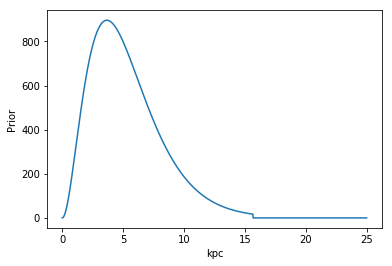

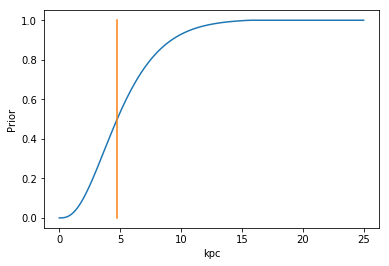

1.0
142 559 1.43 5.6
5.17


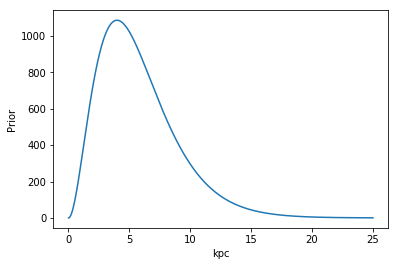

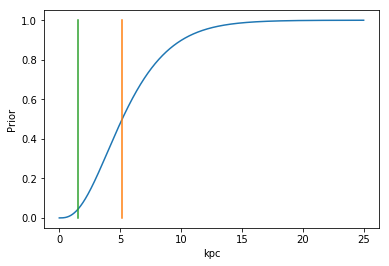

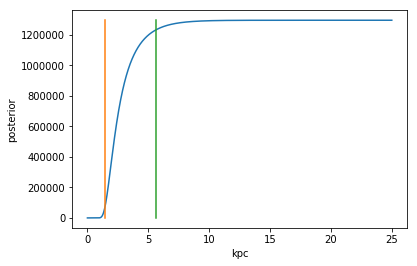

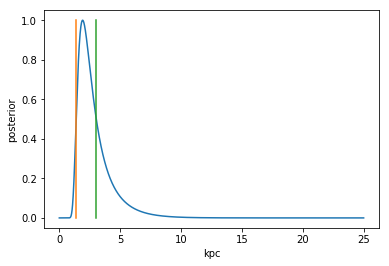

Oh Dear
1.0
343 1111 3.44 11.12
8.32


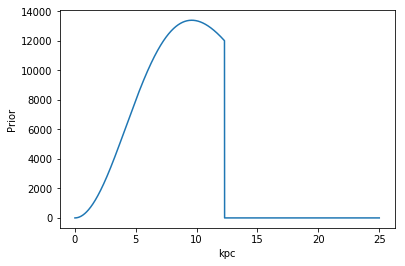

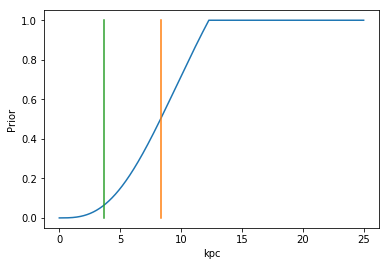

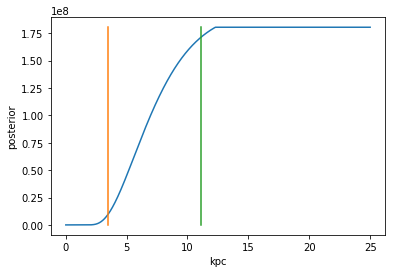

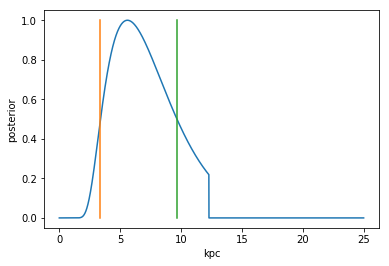

1.0
239 1017 2.4 10.18
4.94


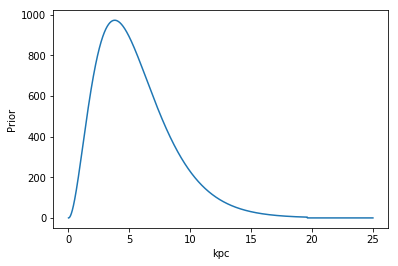

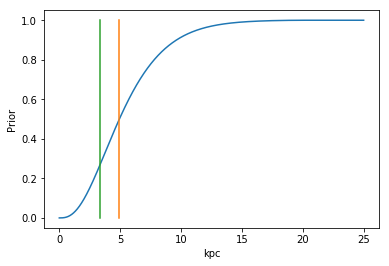

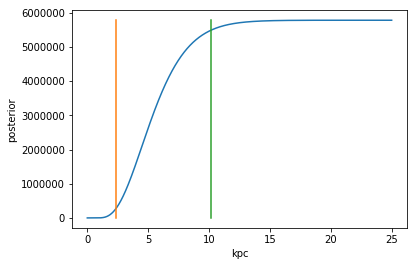

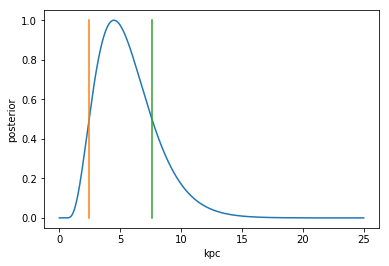

Oh Dear
1.0
295 1352 2.96 13.53
9.23


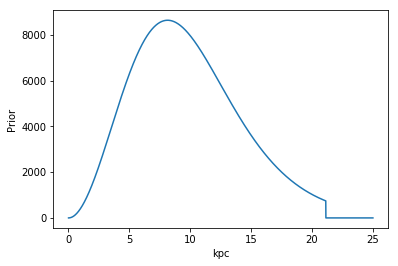

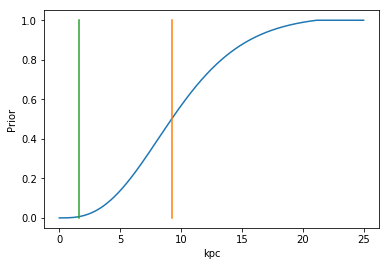

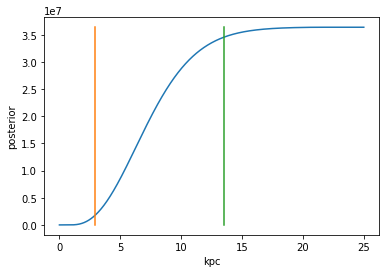

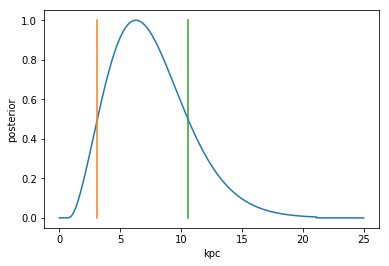

Oh Dear
1
0 0 0.01 0.01
6.74


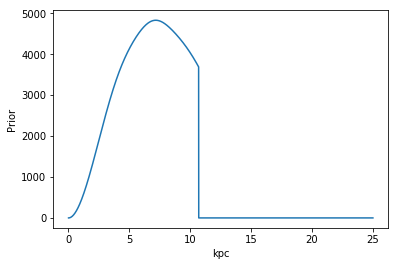

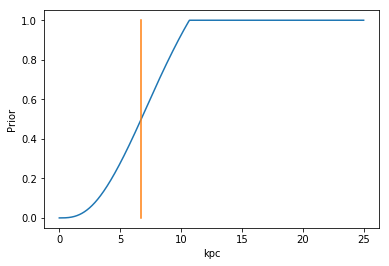

Oh Dear
1.0
201 1252 2.02 12.53
8.52


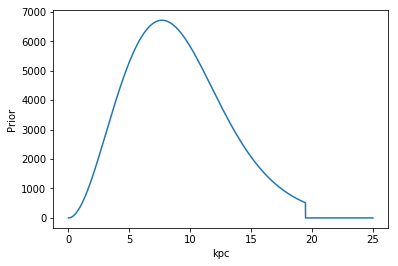

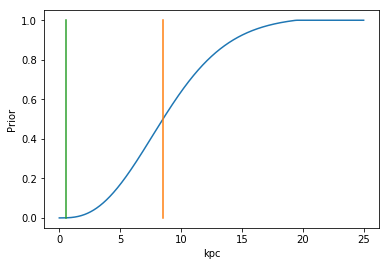

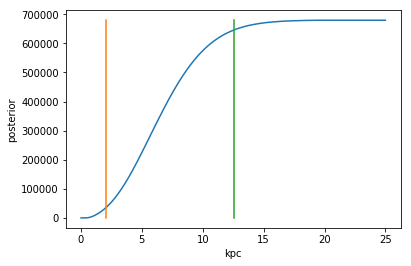

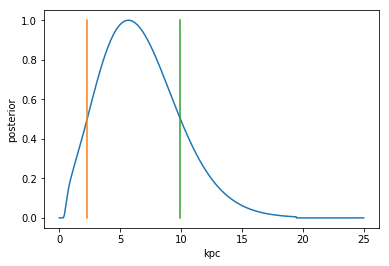

Oh Dear
1.0
559 985 5.6 9.86
6.49


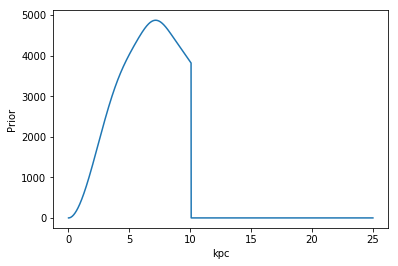

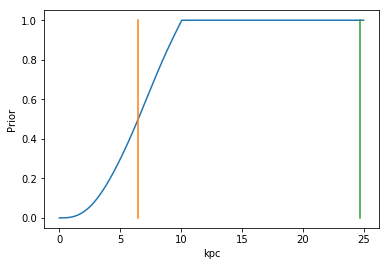

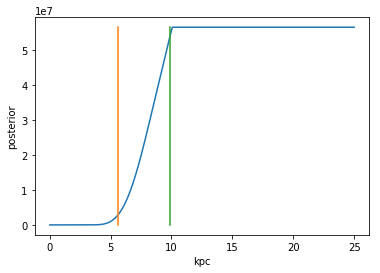

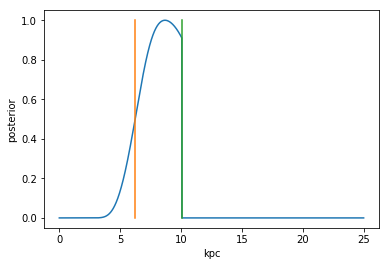

Oh Dear
1
0 0 0.01 0.01
7.66


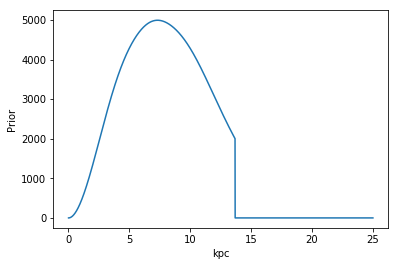

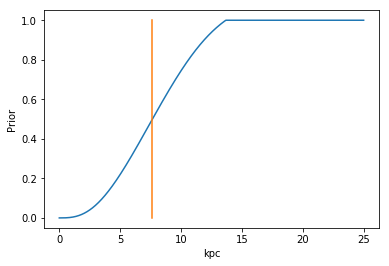

Oh Dear
1.0
182 340 1.83 3.41
2.63


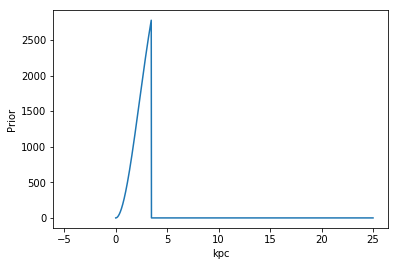

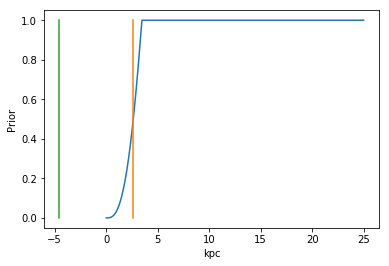

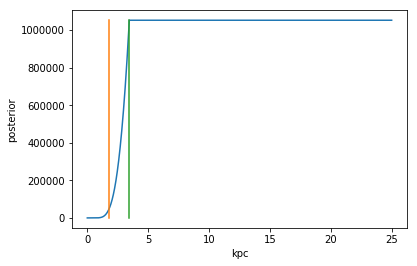

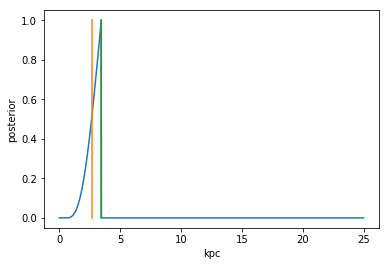

Oh Dear
1.0
354 890 3.55 8.91
7.54


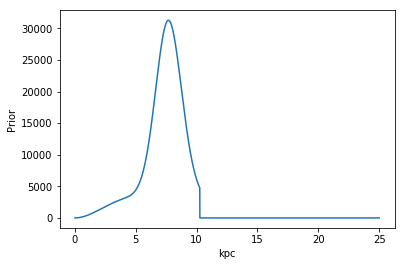

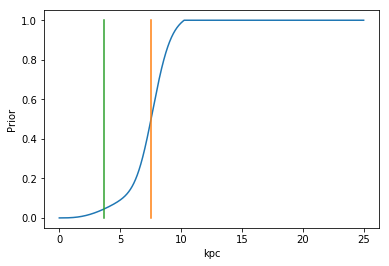

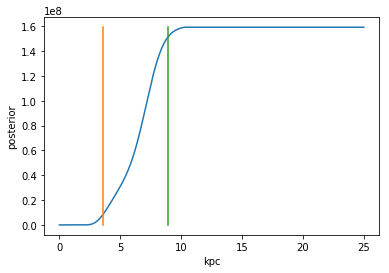

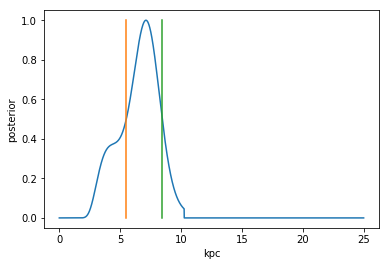

Oh Dear
1
0 0 0.01 0.01
2.45


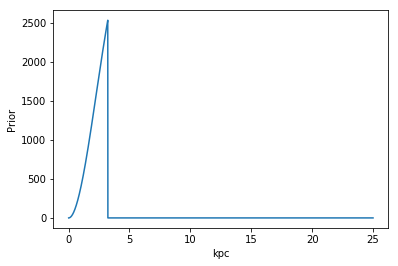

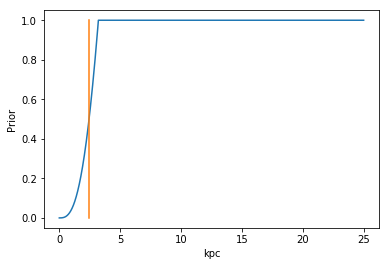

Oh Dear
1
0 0 0.01 0.01
2.45


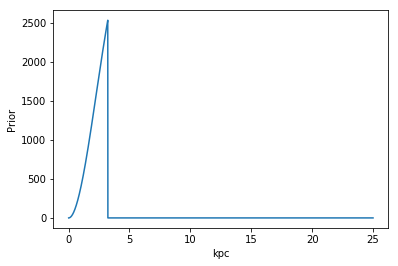

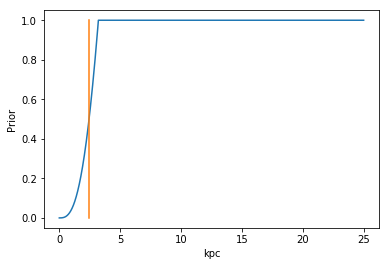

Oh Dear
1
0 0 0.01 0.01
2.45


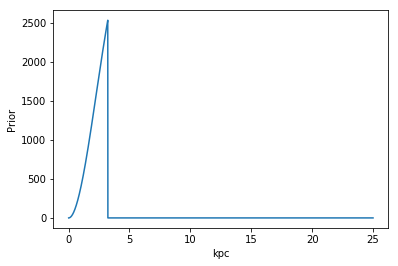

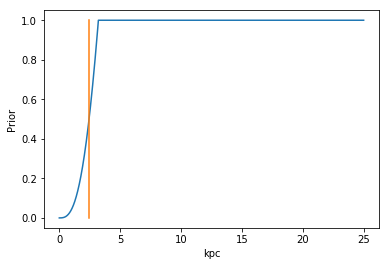

1
0 0 0.01 0.01
7.81


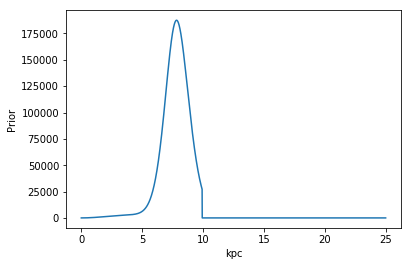

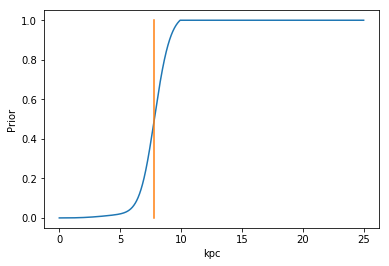

1
0 0 0.01 0.01
7.72


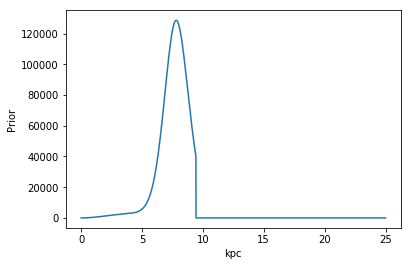

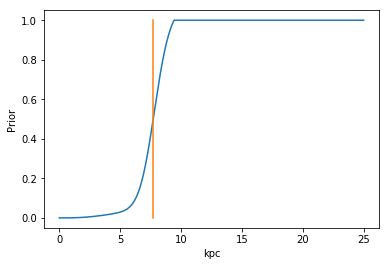

1.0
183 211 1.84 2.12
1.65


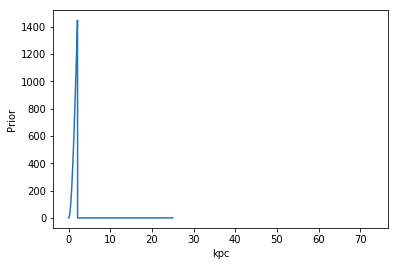

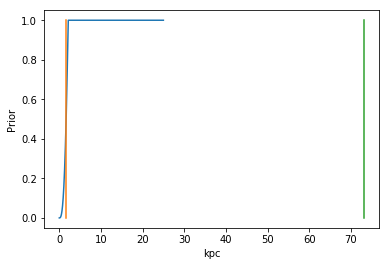

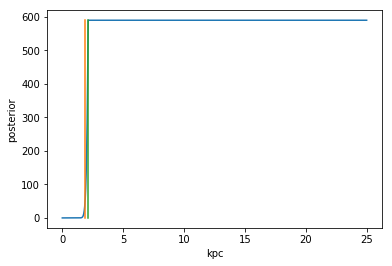

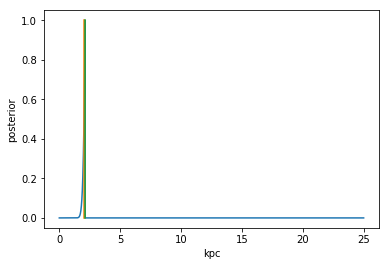

1.0
606 954 6.07 9.55
7.85


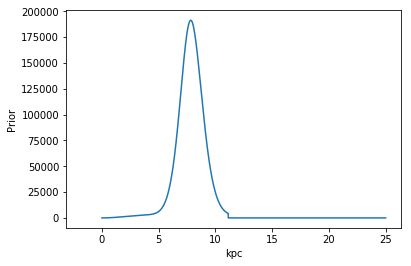

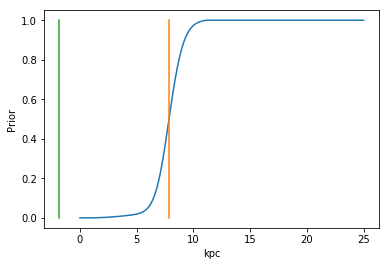

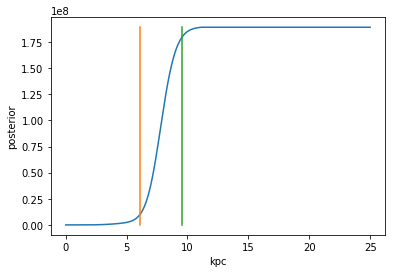

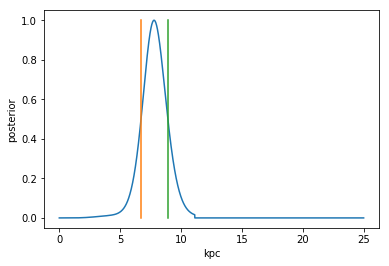

1.0
604 927 6.05 9.28
7.83


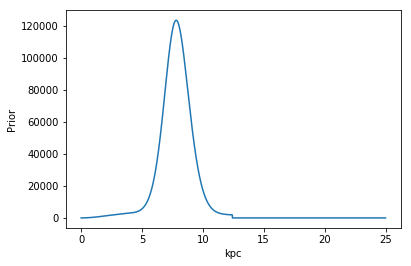

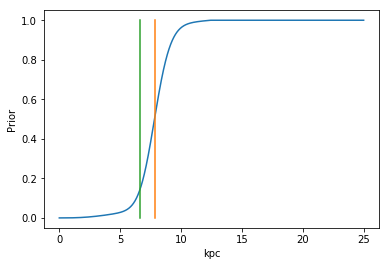

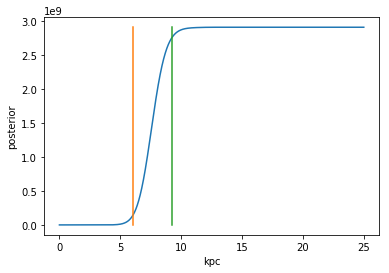

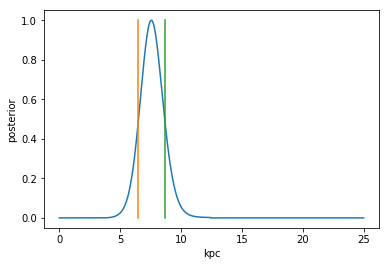

1
0 0 0.01 0.01
9.2


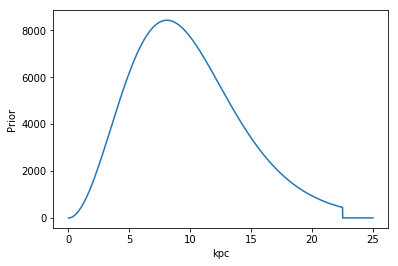

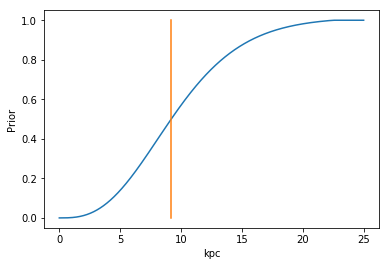

1.0
476 1557 4.77 15.58
9.97


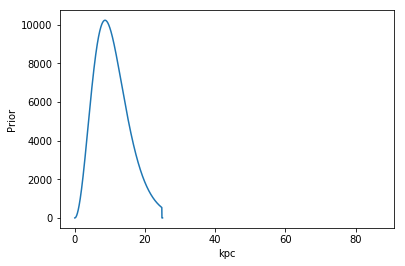

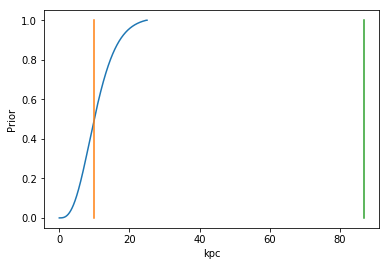

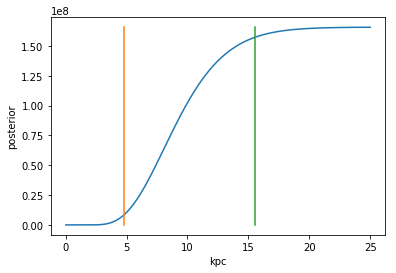

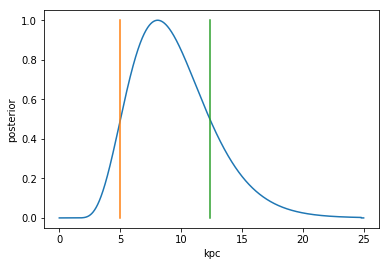

1.0
208 736 2.09 7.37
9.97


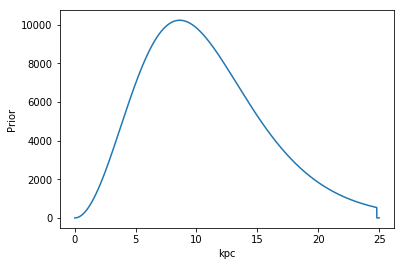

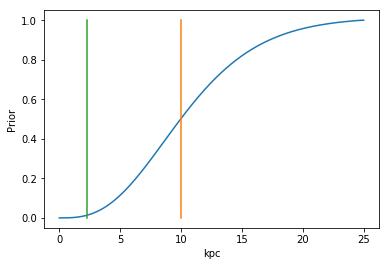

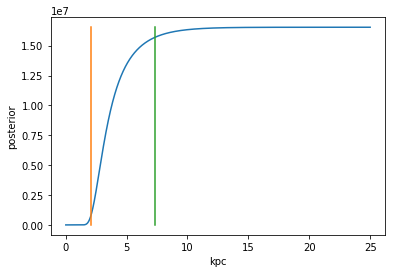

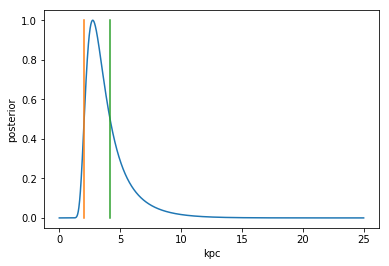

1.0
216 277 2.17 2.78
9.8


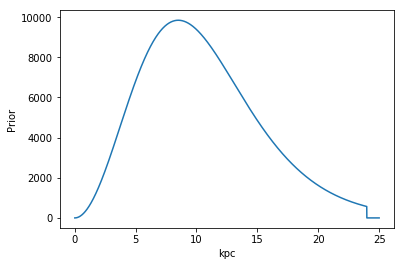

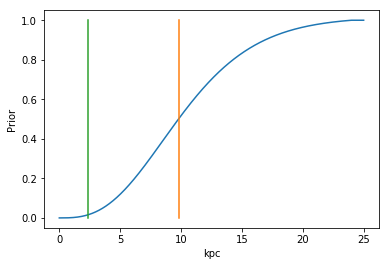

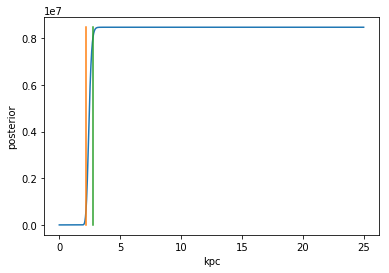

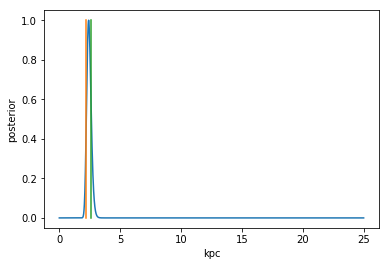

GRO J0422+32 r5 0.01 r95 0.01 error 0.187609261075 r50 [0.01, 0.02]
1A 0620-00 r5 1.43 r95 5.6 error 0.187609261075 r50 [1.4000000000000001, 3.0499999999999998]
GRS 1009-45 r5 3.44 r95 11.12 error 0.187609261075 r50 [3.3899999999999997, 9.6699999999999999]
XTE J1118+480 r5 2.4 r95 10.18 error 0.187609261075 r50 [2.4499999999999997, 7.6100000000000003]
GS 1124-684 r5 2.96 r95 13.53 error 0.187609261075 r50 [3.1399999999999997, 10.57]
SWIFT J1357.2-0933 r5 0.01 r95 0.01 error 0.187609261075 r50 [0.01, 0.02]
GS 1354-64 r5 2.02 r95 12.53 error 0.187609261075 r50 [2.2999999999999998, 9.9499999999999993]
4U 1543-475 r5 5.6 r95 9.86 error 0.187609261075 r50 [6.2400000000000002, 10.07]
XTE J1550-564 r5 0.01 r95 0.01 error 0.187609261075 r50 [0.01, 0.02]
XTE J1650-500 r5 1.83 r95 3.41 error 0.187609261075 r50 [2.6599999999999997, 3.46]
GRO J1655-40 r5 3.55 r95 8.91 error 0.187609261075 r50 [5.5099999999999998, 8.4599999999999991]
GX 339-4 r5 0.01 r95 0.01 error 0.187609261075 r50 [0.01, 0.02]
G

In [144]:
gall = []
galb = []
for x in range(len(info)):#len(info)):#coords)):
    #c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    c = SkyCoord(info[x][1]+' '+info[x][2], unit=(u.hourangle, u.deg))
    gal = c.galactic
    #galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)

priors = []
for x in range(len(info)):#len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.01,25,2500),info[x][3],info[x][5],info[x][6]))
for x in range(len(info)):#len(priors)):
    print(info[x][0],'r5',priors[x][4],'r95',priors[x][5],'error',error,'r50',priors[x][-1])

In [137]:
for x in range(len(info)):#len(priors)):
    error = (priors[x][5]-priors[x][4])/(2*1.645)
    print(info[x][0],'mode',priors[x][1],'r5',priors[x][4],'r95',priors[x][5],'error',error,'r50',priors[x][-1])

GRO J0422+32 mode 1.02805611222 r5 1.0 r95 1.0 error 0.0 r50 [1.0, 1.0280561122244489]
1A 0620-00 mode 2.374749499 r5 1.72945891784 r95 7.03206412826 error 1.61173410651 r50 [1.6733466933867736, 4.0020040080160317]
GRS 1009-45 mode 6.49899799599 r5 3.83366733467 r95 11.4368737475 error 2.3110049887 r50 [3.8617234468937878, 11.044088176352705]
XTE J1118+480 mode 5.26452905812 r5 2.96392785571 r95 11.0440881764 error 2.45597578135 r50 [3.0761523046092183, 8.5470941883767537]
GS 1124-684 mode 7.3126252505 r5 3.72144288577 r95 13.3446893788 error 2.92499893404 r50 [4.0300601202404813, 11.773547094188377]
SWIFT J1357.2-0933 mode 1.02805611222 r5 1.0 r95 1.0 error 0.0 r50 [1.0, 1.0280561122244489]
GS 1354-64 mode 6.83567134269 r5 3.24448897796 r95 12.9238476954 error 2.94205432141 r50 [3.5250501002004007, 11.128256513026052]
4U 1543-475 mode 9.41683366733 r5 5.79759519038 r95 9.89378757515 error 1.24504327805 r50 [6.5831663326653311, 10.062124248496994]
XTE J1550-564 mode 1.02805611222 r5 1.

04:21:42.72   +32:54:26.94
06:22:44.54   -0:20:44.37
10:13:36.40   -45:4:32.52
11:18:10.77   +48:2:12.21
11:26:26.59   -68:40:32.89
13:57:16.83   -9:32:38.79
13:58:9.71   -64:44:5.29
15:47:8.27   -47:40:10.37
15:50:58.65   -56:28:35.31
16:50:0.81   -49:57:43.77
16:54:0.14   -39:50:44.87
17:02:49.28   -48:47:22.81
17:02:49.29   -48:47:22.12
17:02:49.38   -48:47:23.17
17:08:14.50   -25:5:30.29
17:52:15.11   -22:20:31.42
17:53:28.29   -1:27:6.31
18:17:43.49   -33:1:8.80
18:19:21.64   -25:24:25.84
20:02:49.52   +25:14:10.64
20:24:3.82   +33:52:3.26
20:24:3.82   +33:52:1.83
19:58:21.67   +35:12:5.69
0.02
7.95


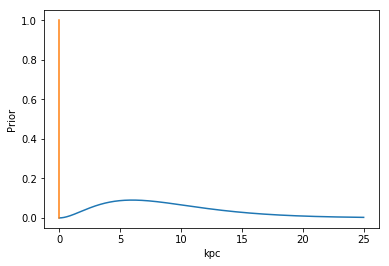

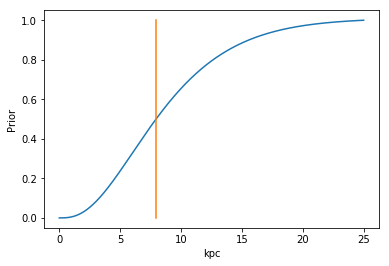

1.98
7.95


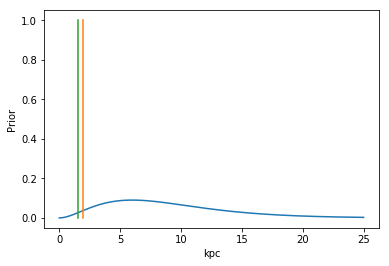

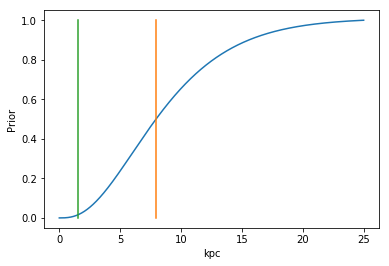

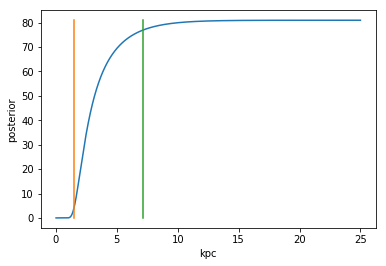

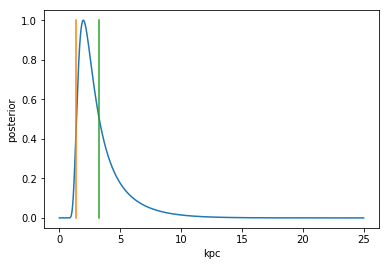

4.59
7.95


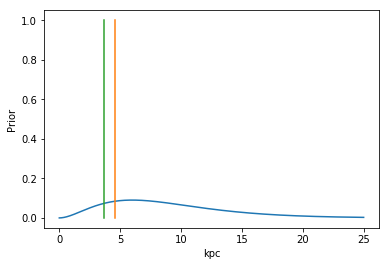

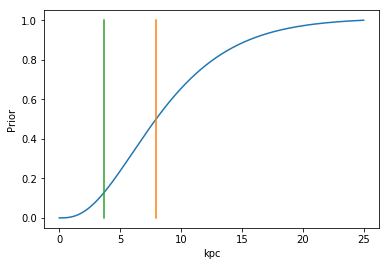

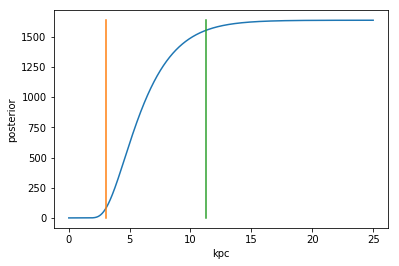

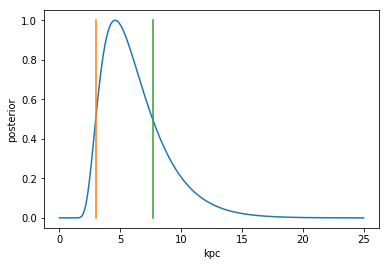

5.79
7.95


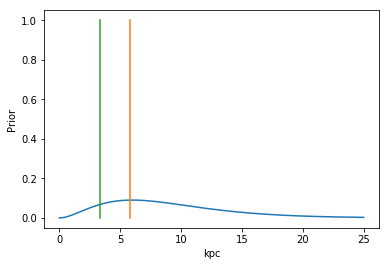

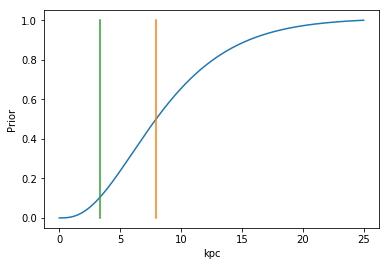

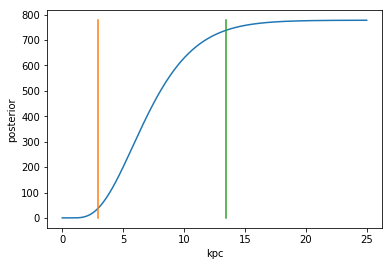

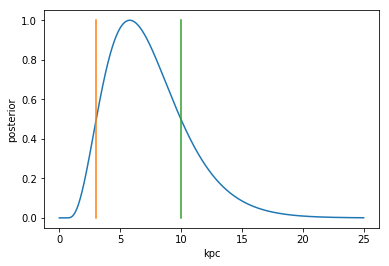

4.93
7.95


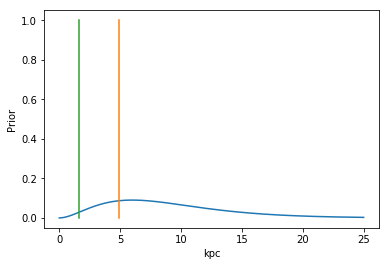

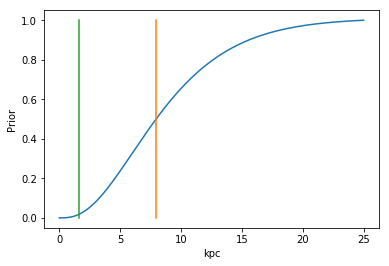

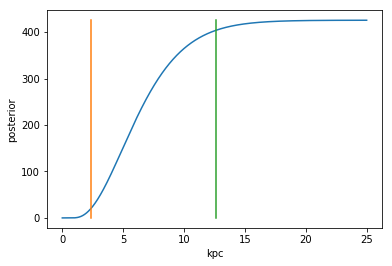

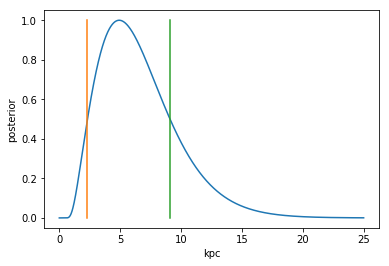

0.02
7.95


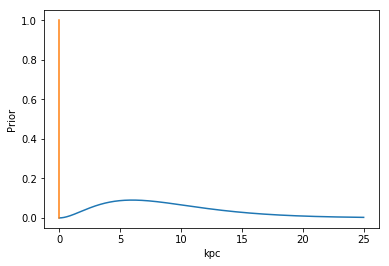

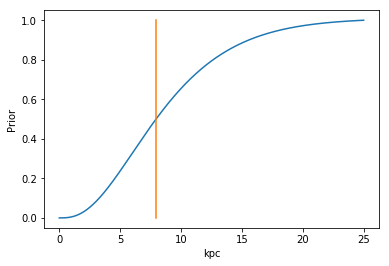

4.36
7.95


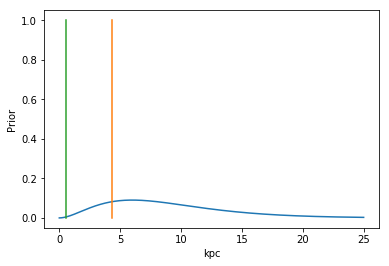

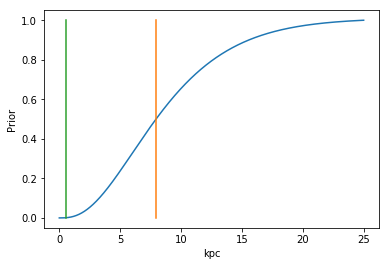

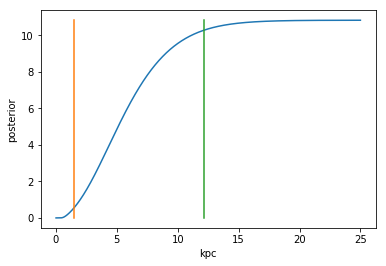

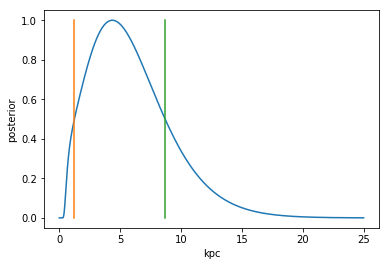

8.66
7.95


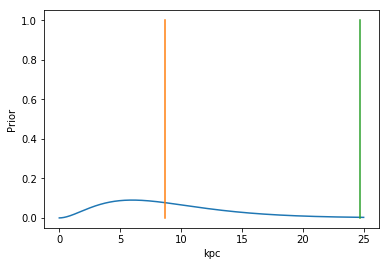

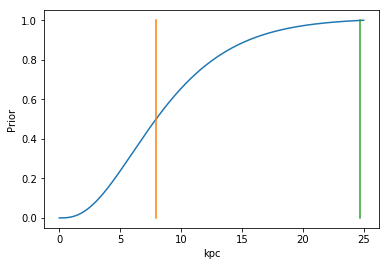

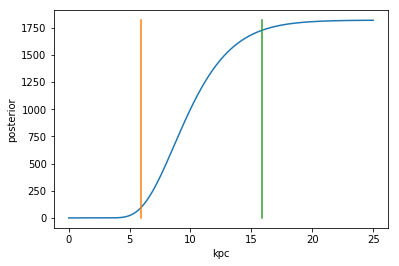

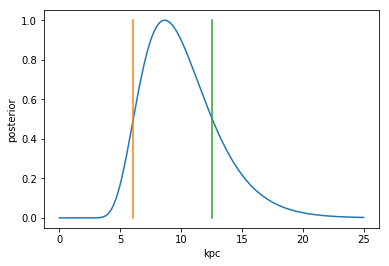

0.02
7.95


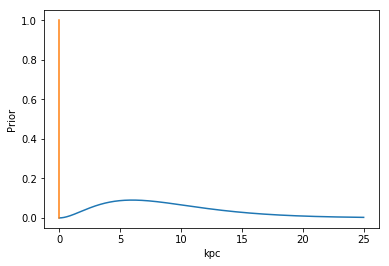

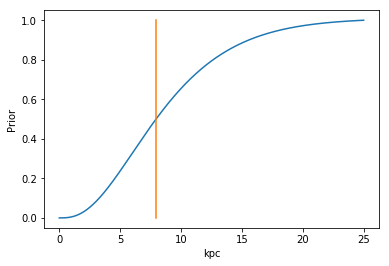

6.21
7.95


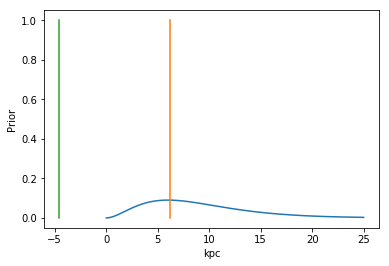

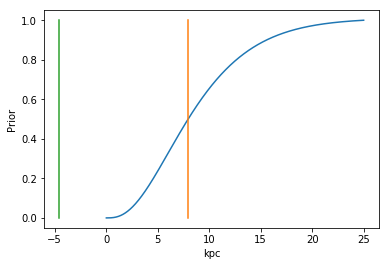

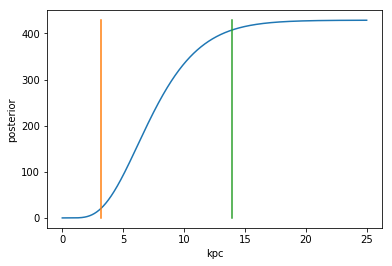

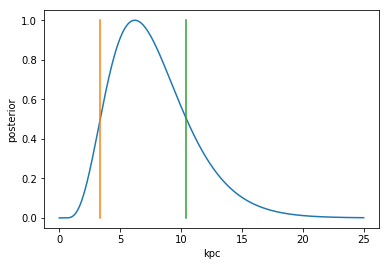

4.21
7.95


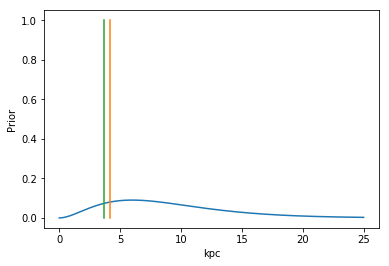

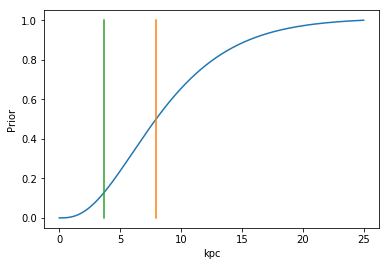

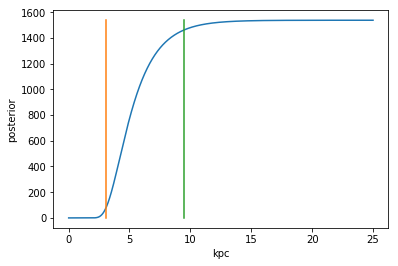

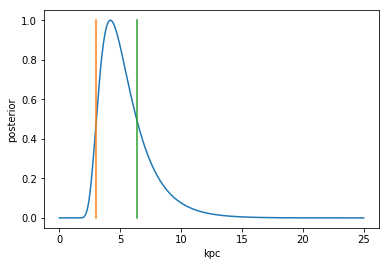

0.02
7.95


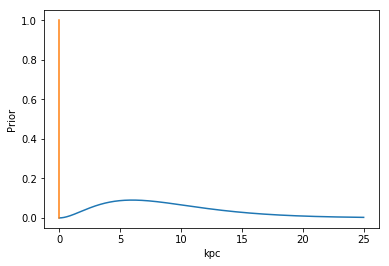

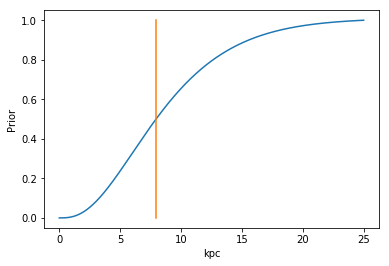

0.02
7.95


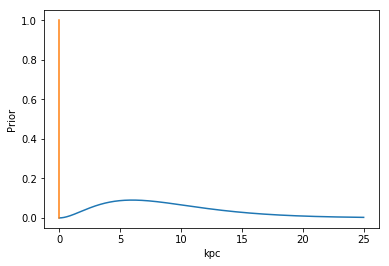

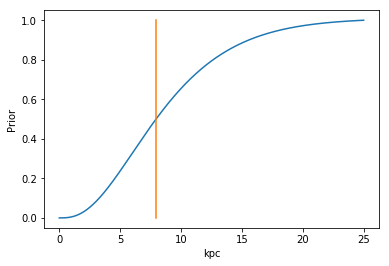

0.02
7.95


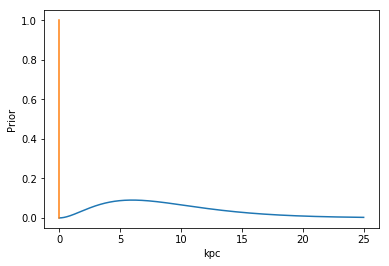

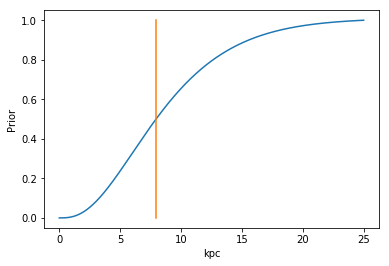

0.02
7.95


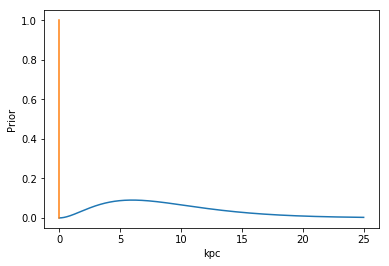

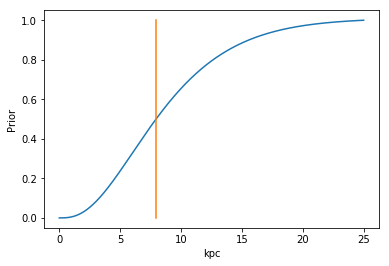

0.02
7.95


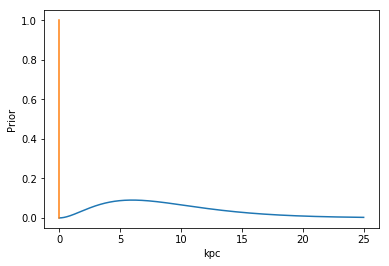

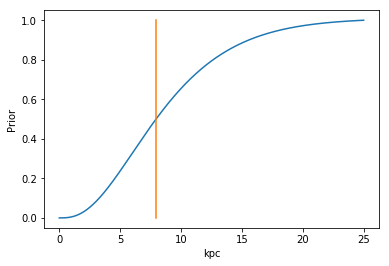

7.47
7.95


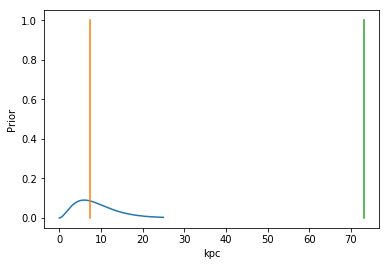

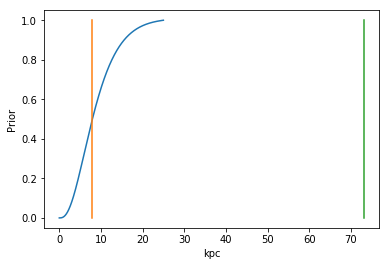

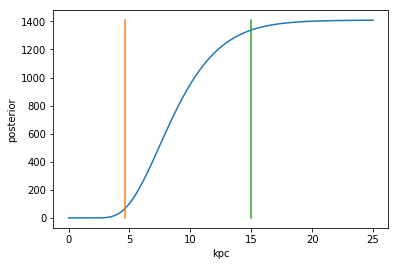

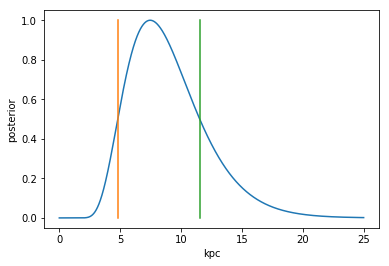

6.38
7.95


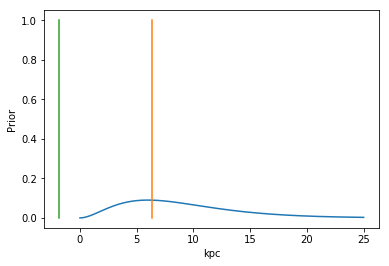

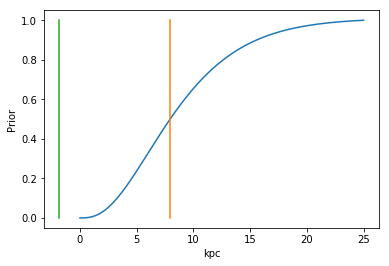

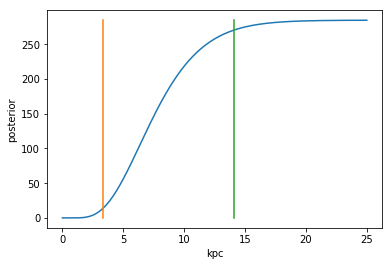

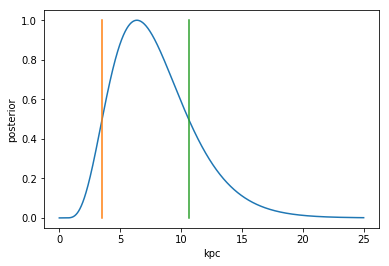

6.51
7.95


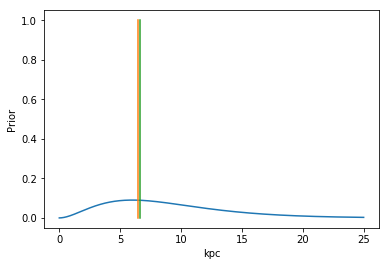

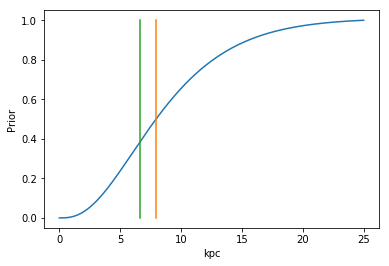

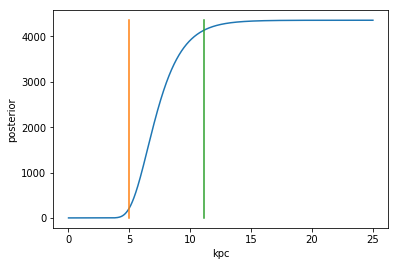

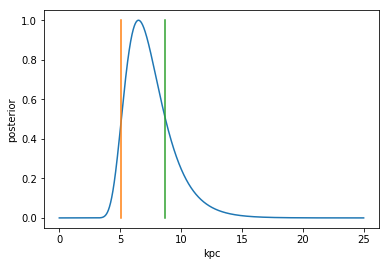

0.02
7.95


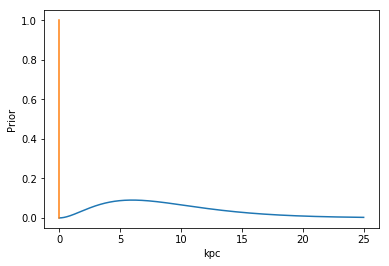

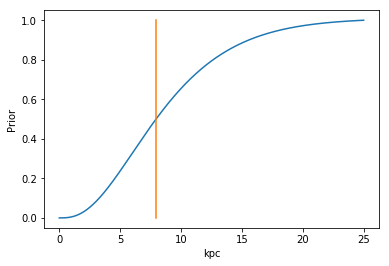

6.99
7.95


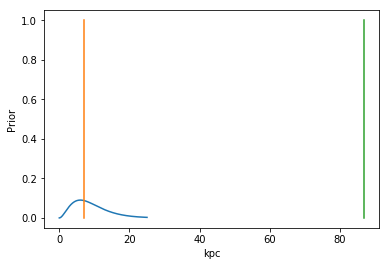

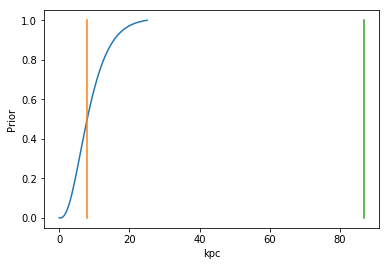

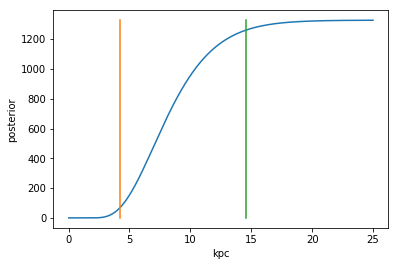

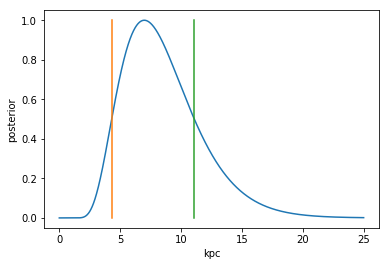

2.63
7.95


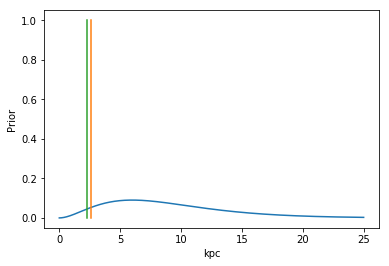

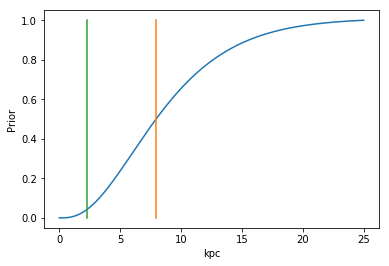

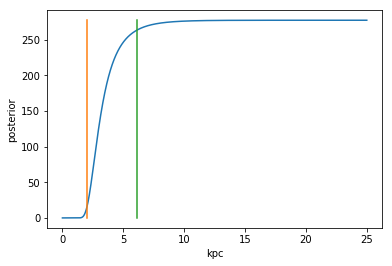

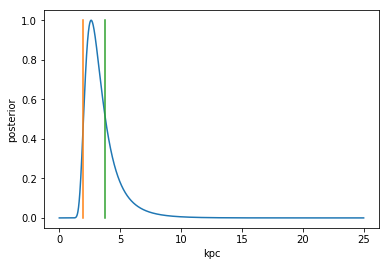

2.41
7.95


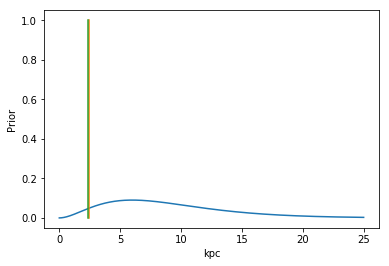

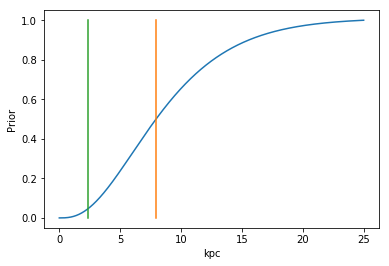

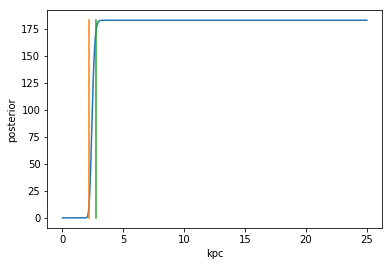

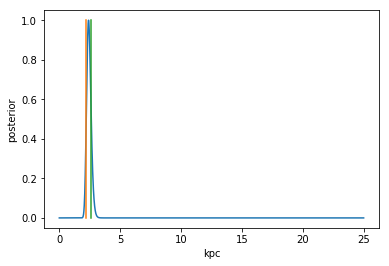

GRO J0422+32 mode 0.02 r5 0.01 r95 0.01 error 0.0 r50 [0.01, 0.02]
1A 0620-00 mode 1.98 r5 1.48 r95 7.14 error 1.72036474164 r50 [1.4199999999999999, 3.29]
GRS 1009-45 mode 4.59 r5 3.07 r95 11.31 error 2.50455927052 r50 [3.0, 7.6699999999999999]
XTE J1118+480 mode 5.79 r5 2.97 r95 13.49 error 3.19756838906 r50 [3.04, 9.9900000000000002]
GS 1124-684 mode 4.93 r5 2.4 r95 12.67 error 3.12158054711 r50 [2.3199999999999998, 9.0999999999999996]
SWIFT J1357.2-0933 mode 0.02 r5 0.01 r95 0.01 error 0.0 r50 [0.01, 0.02]
GS 1354-64 mode 4.36 r5 1.47 r95 12.17 error 3.25227963526 r50 [1.25, 8.6999999999999993]
4U 1543-475 mode 8.66 r5 5.9 r95 15.9 error 3.03951367781 r50 [6.0800000000000001, 12.56]
XTE J1550-564 mode 0.02 r5 0.01 r95 0.01 error 0.0 r50 [0.01, 0.02]
XTE J1650-500 mode 6.21 r5 3.22 r95 13.92 error 3.25227963526 r50 [3.3699999999999997, 10.449999999999999]
GRO J1655-40 mode 4.21 r5 3.07 r95 9.45 error 1.93920972644 r50 [3.0499999999999998, 6.3600000000000003]
GX 339-4 mode 0.02 r5 0.

In [145]:
gall = []
galb = []
for x in range(len(info)):
    #c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    print(info[x][1],' ',info[x][2])
    c = SkyCoord(info[x][1]+' '+info[x][2], unit=(u.hourangle, u.deg))
    gal = c.galactic
    #galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)

priors = []

for x in range(len(info)):
    priors.append(newPriorExp(gall[x],galb[x],np.linspace(0.01,25,2500),info[x][3],info[x][5],info[x][6]))

for x in range(len(info)):
    error = (priors[x][5]-priors[x][4])/(2*1.645)
    print(info[x][0],'mode',priors[x][1],'r5',priors[x][4],'r95',priors[x][5],'error',error,'r50',priors[x][-1])# for x in range(2):#len(galb)):
#     priors.append(newPriorExp(gall[x],galb[x],np.linspace(1,15,30),info[x][3],info[x][5],info[x][6],))

# for x in range(2):#len(priors)):
#     print('priors',priors[x],'distance',info[x][3])

In [114]:
for x in range(len(info)):
    error = (priors[x][5]-priors[x][4])/(2*1.645)
    print(info[x][0],'r5',priors[x][4],'r95',priors[x][5],'error',error,'r50',priors[x][-1])

GRO J0422+32 r5 1.0 r95 1.0 error 0.0 r50 1.0
1A 0620-00 r5 1.51851851852 r95 8.41341341341 error 2.09571273401 r50 8.41341341341
GRS 1009-45 r5 3.24224224224 r95 12.1131131131 error 2.69631333461 r50 12.1131131131
XTE J1118+480 r5 3.34034034034 r95 13.3883883884 error 3.05411794773 r50 13.3883883884
GS 1124-684 r5 2.72372372372 r95 13.01001001 error 3.12653078611 r50 13.01001001
SWIFT J1357.2-0933 r5 1.0 r95 1.0 error 0.0 r50 1.0
GS 1354-64 r5 2.02302302302 r95 12.7997997998 error 3.27561604157 r50 12.7997997998
4U 1543-475 r5 6.18518518519 r95 14.1871871872 error 2.4322194535 r50 14.1871871872
XTE J1550-564 r5 1.0 r95 1.0 error 0.0 r50 1.0
XTE J1650-500 r5 3.62062062062 r95 13.5565565566 error 3.02004131791 r50 13.5565565566
GRO J1655-40 r5 3.17217217217 r95 10.4034034034 error 2.19794262347 r50 10.4034034034
GX 339-4 r5 1.0 r95 1.0 error 0.0 r50 1.0
GX 339-4 r5 1.0 r95 1.0 error 0.0 r50 1.0
GX 339-4 r5 1.0 r95 1.0 error 0.0 r50 1.0
H 1705-250 r5 1.0 r95 1.0 error 0.0 r50 1.0
XTE J17

In [142]:
25/0.001

25000.0

In [44]:
for x in range(2):#len(priors)):
    print('posteriors',priors[x][2],'distance',info[x][3])

posteriors [] distance none
posteriors [0.0, 0.20495154897265758, 0.73004731764570019, 0.86471710558479853, 0.75561782945721578, 0.59821421186704271, 0.45789166323927022, 0.34660737818654663, 0.26155681954903881, 0.19728208139687423, 0.14881734341509845, 0.11225087220326628, 0.084629639218366012, 0.063748180453651784, 0.047958333027068596, 0.036023144392147335, 0.027009860051023456, 0.020212319621466968, 0.015094423589316008, 0.011248539064322187, 0.0083645596310449495, 0.0062066612468207605, 0.0045957003299363641, 0.0033958070181723983, 0.0025041352918741522, 0.0018430108741611842, 0.0013539124619418739, 0.00099286063106223147, 0.00072688995556143931, 0.00053135515212319085] distance 1.57


In [34]:
L = 3.5
x = 
posterioir = (((((x**2)*np.exp(-x/L))/info[1][6])*np.exp((-1/(2*(info[1][6]**2)))*((info[1][5]-(1/x))**2))))#*Prior)
print(posterioir)

0.01256155726


60


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


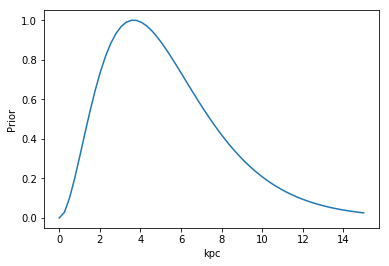

14
3.5593220339
18
4.57627118644


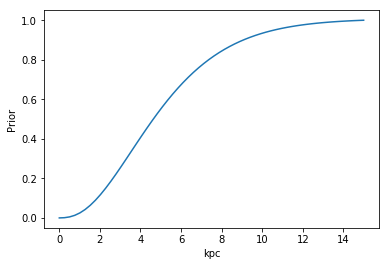

priors [4.5762711864406782, 3.5593220338983049] distance 2.49


In [36]:
gall = []
galb = []

priors = []
for x in range(len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.0,15,60)))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])
                

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


30
7
3.62068965517
9
4.65517241379


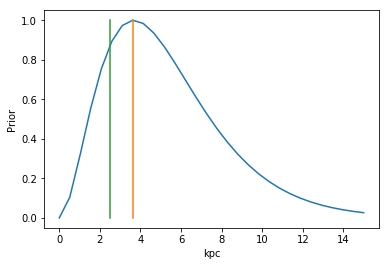

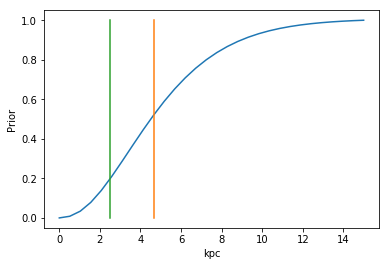

30
7
3.62068965517
9
4.65517241379


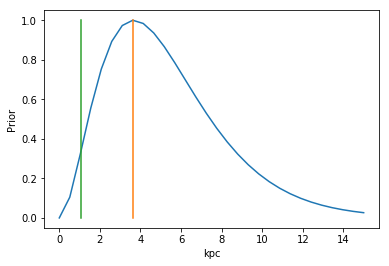

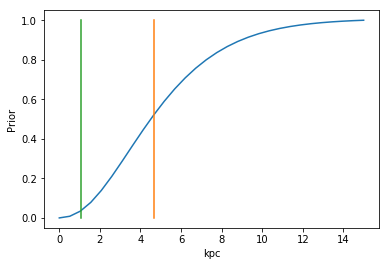

30
8
4.13793103448
9
4.65517241379


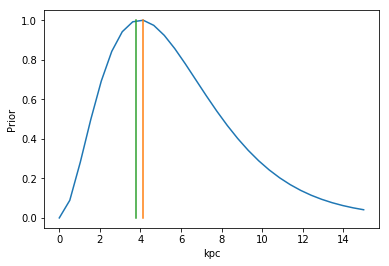

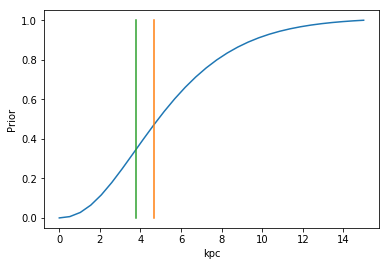

Oh Dear
30
19
9.8275862069
15
7.75862068966


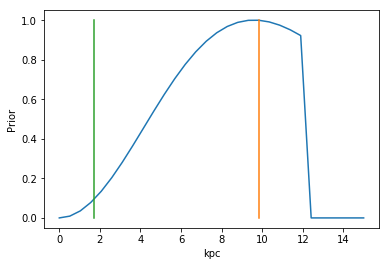

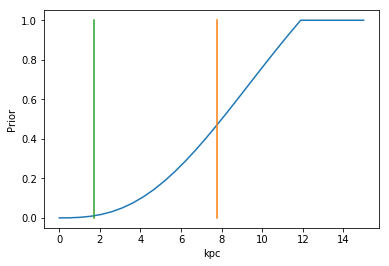

30
7
3.62068965517
9
4.65517241379


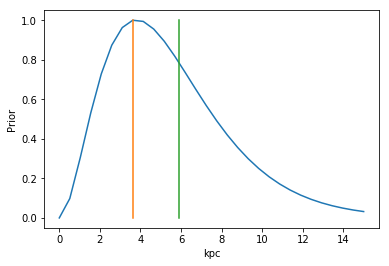

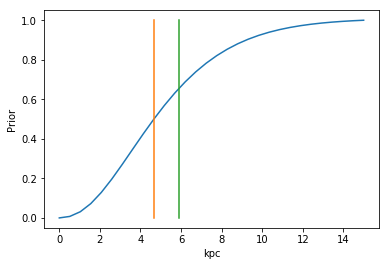

priors [4.6551724137931041, 3.6206896551724141] distance 2.49
priors [4.6551724137931041, 3.6206896551724141] distance 1.0599999
priors [4.6551724137931041, 4.1379310344827589] distance 3.8
priors [7.7586206896551726, 9.8275862068965516] distance 1.7
priors [4.6551724137931041, 3.6206896551724141] distance 5.9000001


In [52]:
for x in range(5):#coords)):
    c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    c = SkyCoord(ra[x], dec[x], frame='icrs', unit='deg')
    gal = c.galactic
    #galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)

priors = []
for x in range(5):#len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.0,15,30),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


30
7
3.62068965517
9
4.65517241379


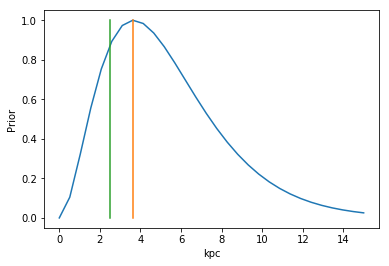

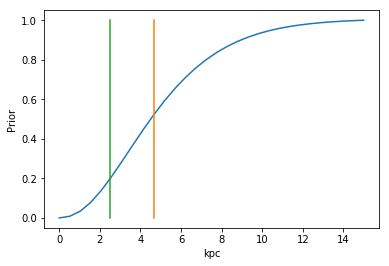

30
7
3.62068965517
9
4.65517241379


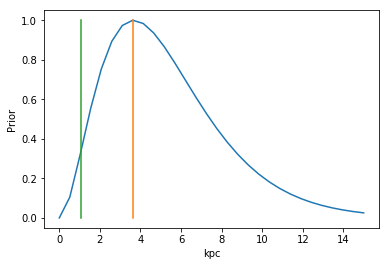

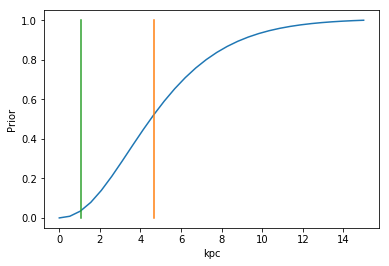

30
8
4.13793103448
9
4.65517241379


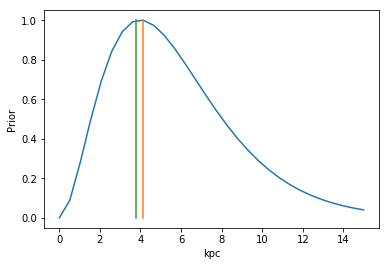

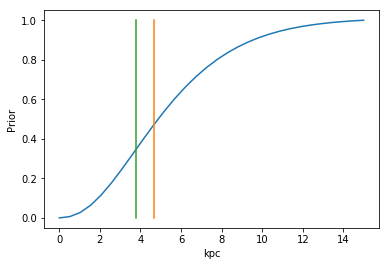

Oh Dear
30
19
9.8275862069
15
7.75862068966


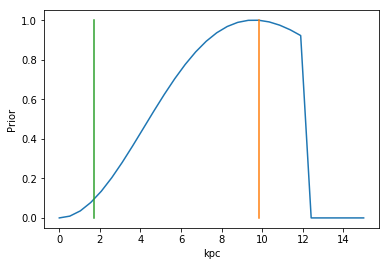

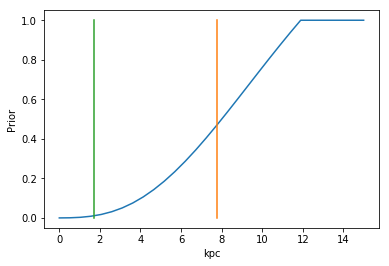

30
7
3.62068965517
9
4.65517241379


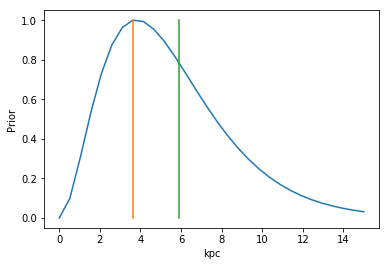

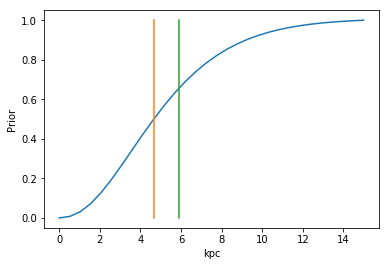

priors [4.6551724137931041, 3.6206896551724141] distance 2.49
priors [4.6551724137931041, 3.6206896551724141] distance 1.0599999
priors [4.6551724137931041, 4.1379310344827589] distance 3.8
priors [7.7586206896551726, 9.8275862068965516] distance 1.7
priors [4.6551724137931041, 3.6206896551724141] distance 5.9000001


In [53]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoSphere(gall[x],galb[x],np.linspace(0.0,15,30),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

30
7
3.62068965517
9
4.65517241379


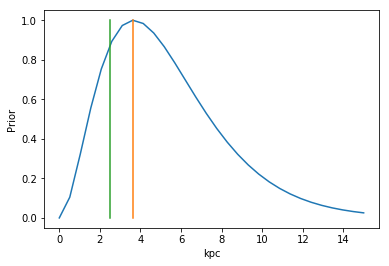

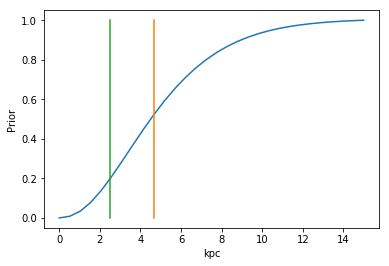

30
7
3.62068965517
9
4.65517241379


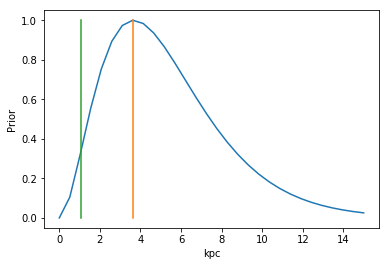

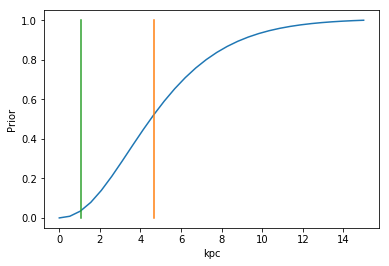

30
8
4.13793103448
9
4.65517241379


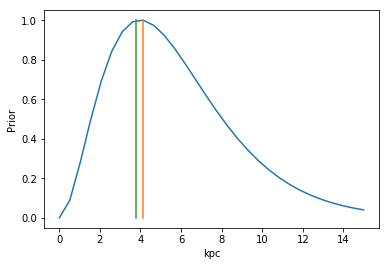

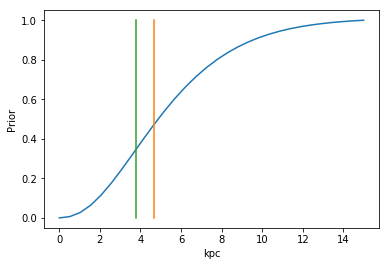

30
19
9.8275862069
18
9.31034482759


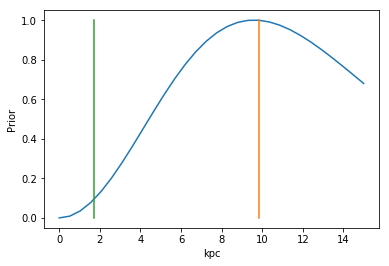

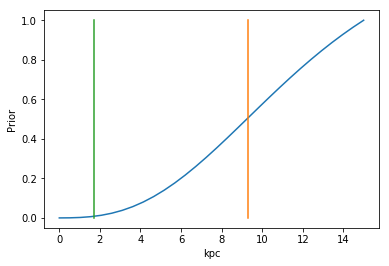

30
7
3.62068965517
9
4.65517241379


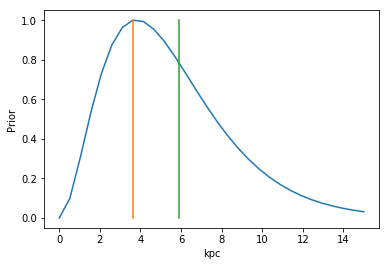

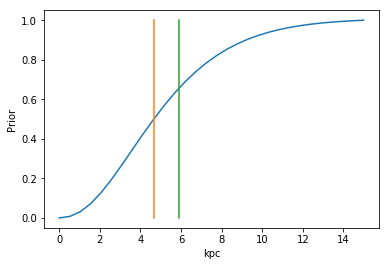

priors [4.6551724137931041, 3.6206896551724141] distance 2.49
priors [4.6551724137931041, 3.6206896551724141] distance 1.0599999
priors [4.6551724137931041, 4.1379310344827589] distance 3.8
priors [9.3103448275862082, 9.8275862068965516] distance 1.7
priors [4.6551724137931041, 3.6206896551724141] distance 5.9000001


In [54]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoMag(gall[x],galb[x],np.linspace(0.0,15,30),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


100
24
3.63636363636
31
4.69696969697


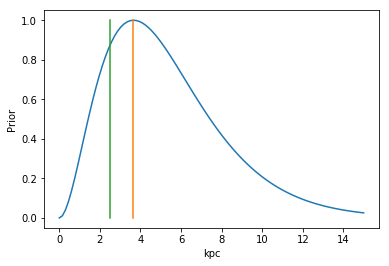

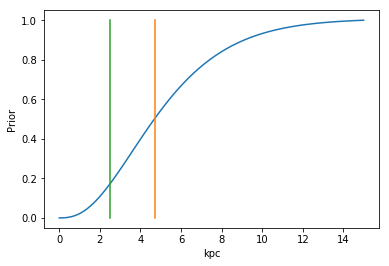

100
24
3.63636363636
31
4.69696969697


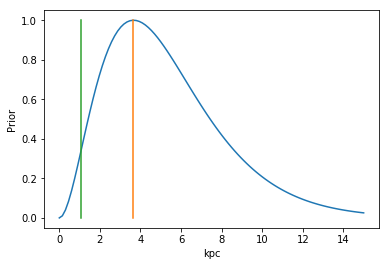

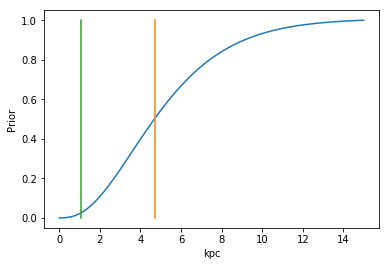

100
26
3.93939393939
33
5.0


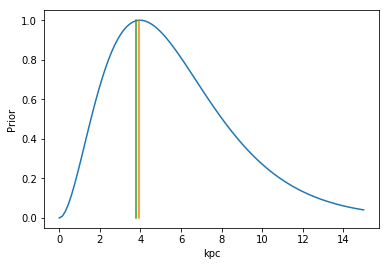

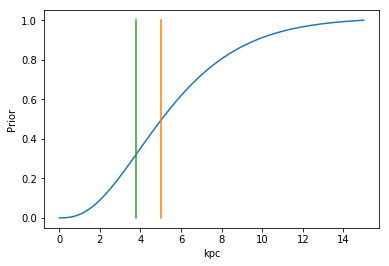

Oh Dear
100
63
9.54545454545
55
8.33333333333


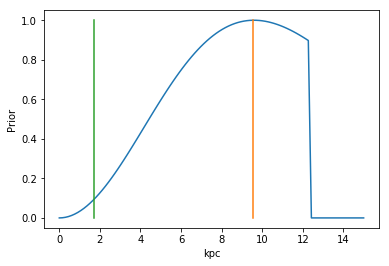

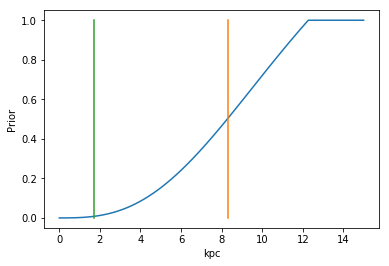

100
25
3.78787878788
32
4.84848484848


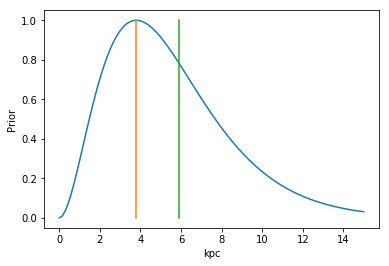

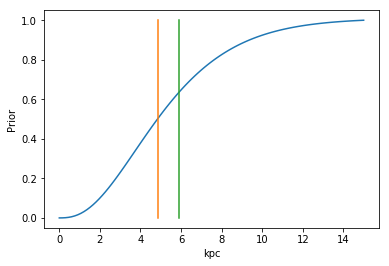

priors [4.6969696969696972, 3.6363636363636367] distance 2.49
priors [4.6969696969696972, 3.6363636363636367] distance 1.0599999
priors [5.0, 3.9393939393939394] distance 3.8
priors [8.3333333333333339, 9.545454545454545] distance 1.7
priors [4.8484848484848486, 3.7878787878787881] distance 5.9000001


In [55]:
for x in range(5):#coords)):
    c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    gal = c.galactic
    #galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)

priors = []
for x in range(5):#len(galb)):
    priors.append(newPrior(gall[x],galb[x],np.linspace(0.0,15,100),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


100
24
3.63636363636
31
4.69696969697


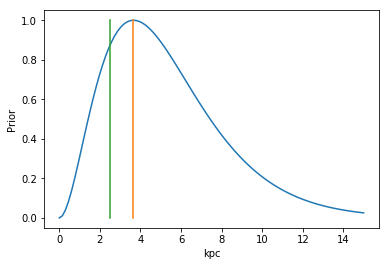

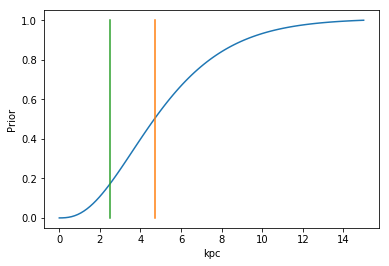

100
24
3.63636363636
31
4.69696969697


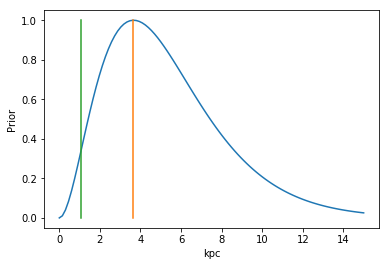

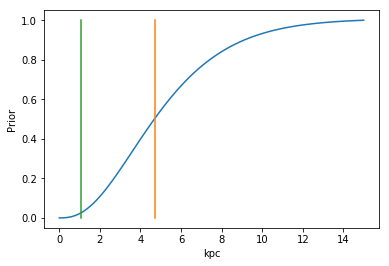

100
26
3.93939393939
33
5.0


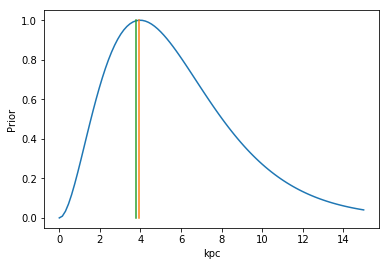

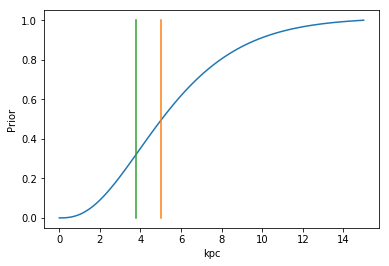

Oh Dear
100
63
9.54545454545
55
8.33333333333


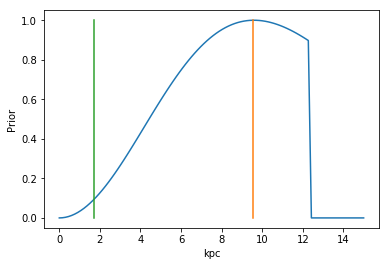

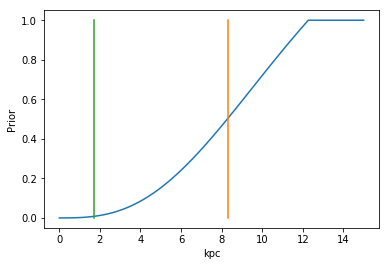

100
25
3.78787878788
32
4.84848484848


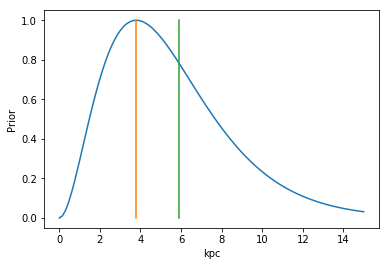

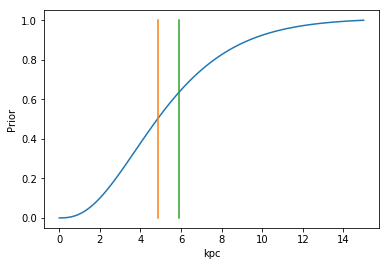

priors [4.6969696969696972, 3.6363636363636367] distance 2.49
priors [4.6969696969696972, 3.6363636363636367] distance 1.0599999
priors [5.0, 3.9393939393939394] distance 3.8
priors [8.3333333333333339, 9.545454545454545] distance 1.7
priors [4.8484848484848486, 3.7878787878787881] distance 5.9000001


In [56]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoSphere(gall[x],galb[x],np.linspace(0.0,15,100),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

100
24
3.63636363636
31
4.69696969697


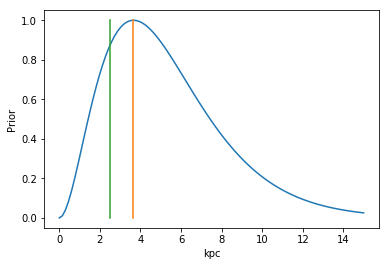

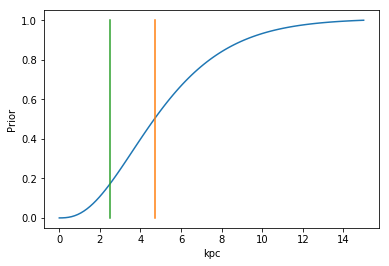

100
24
3.63636363636
31
4.69696969697


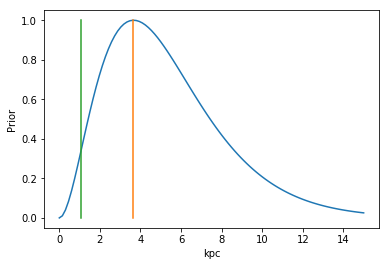

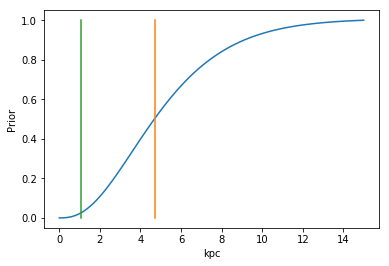

100
26
3.93939393939
33
5.0


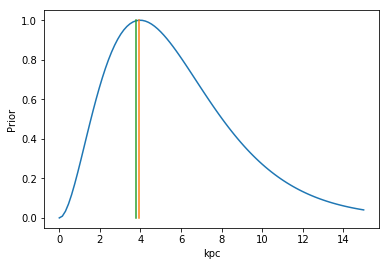

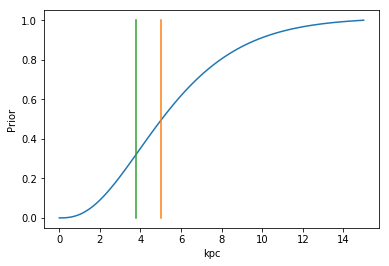

100
63
9.54545454545
62
9.39393939394


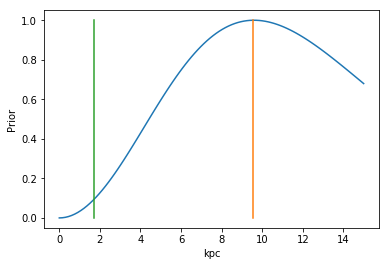

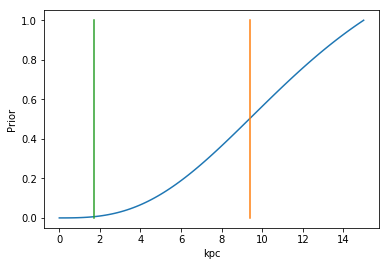

100
25
3.78787878788
32
4.84848484848


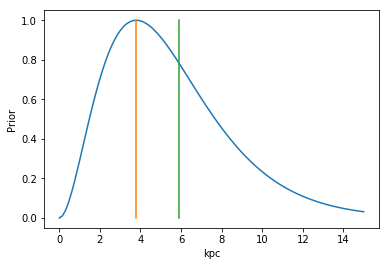

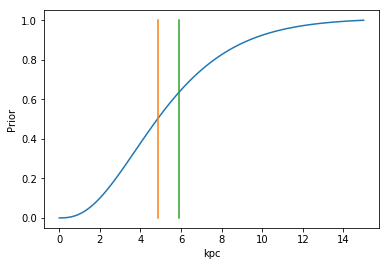

priors [4.6969696969696972, 3.6363636363636367] distance 2.49
priors [4.6969696969696972, 3.6363636363636367] distance 1.0599999
priors [5.0, 3.9393939393939394] distance 3.8
priors [9.3939393939393945, 9.545454545454545] distance 1.7
priors [4.8484848484848486, 3.7878787878787881] distance 5.9000001


In [57]:
priors = []
for x in range(5):#len(galb)):
    priors.append(newPriorNoMag(gall[x],galb[x],np.linspace(0.0,15,100),distList[x]))

for x in range(len(priors)):
    print('priors',priors[x],'distance',distList[x])

30
15
7.75862068966
15
7.75862068966


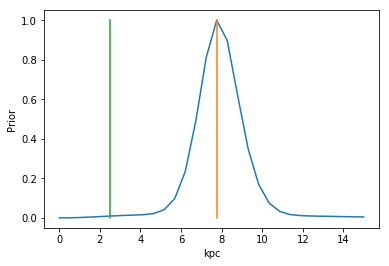

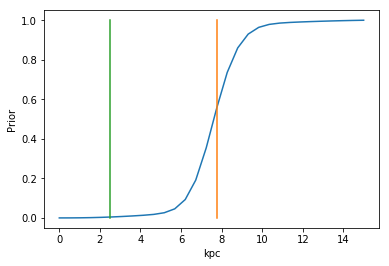

[7.7586206896551726, 7.7586206896551726]

In [59]:
newPriorNoMag(0,0,np.linspace(0.0,15,30),distList[0])